<a href="https://colab.research.google.com/github/RoshanJamthe/Cardiovascular-risk-prediction-classifier/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

##Problem statement

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.
## Data Description
####Demographic:
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

####Behavioral
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

####Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

####Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

###Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

![](https://drive.google.com/uc?export=view&id=1OLsUAqrWcyjmgFlGQHHESqHfWpTVjAC9)

# <b><u>Data Wrangling

## Dataset Loading

In [4]:
# Importing Data Wrangling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import time

import warnings
warnings.simplefilter("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project/ML/Cardiovascular risk prediction/data_cardiovascular_risk.csv")

In [7]:
# View the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0



> There are object type features they need to be converted into the numerical format

>There are missing values so those needs to be treated as well.

> The dependent feature 'TenYearCHD' is in required data type format



In [8]:
# Drop 'id' column
df.drop('id',axis=1,inplace=True)

In [9]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB




> Data has some null values.



In [10]:
# Describe the features
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
# Get unique values from each feature
def unique_values(df):
  for col in df.columns:
    print(f'{col} : {df[col].unique()}')
    print("-*-"*30)

unique_values(df)    

age : [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
education : [ 2.  4.  1.  3. nan]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
sex : ['F' 'M']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
is_smoking : ['YES' 'NO']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
cigsPerDay : [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
BPMeds : [ 0. nan  1.]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
prevalentStroke : [0 1]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

* All the independent features are discrete in nature.

* There is no mismatched data 

## Check for Duplicated data 

In [12]:
df.duplicated().sum()

0



> The dataset has 0 duplicate rows




## Basic EDA

In [13]:
# Build a function to get [box_plot and dist_plot for continuous values feature] and [box_plot and bar_plot for discrete plot]
def get_eda(df,dependent_feature):
  for col in df.columns:

    # Continuous features
    if len(df[col].unique())>20:
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      fig = sns.boxplot(y=df[col])       # Box plot
      fig.set_title('',fontsize=17)
      fig.set_ylabel(col,fontsize=13)
      
      plt.subplot(1, 2, 2)
      fig = sns.distplot(df[col].dropna(),color='purple')  # Dist plot
      fig.set_ylabel('Frequency',fontsize=13)
      fig.set_xlabel(col,fontsize=13)
      plt.title(f'{col} Distribution',fontsize=17)
      plt.show()

    # Categorical features
    else:
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      fig = sns.boxplot(df[col],df[dependent_feature])  # Box plot
      fig.set_title('')
      fig.set_ylabel(dependent_feature,fontsize=13)

      plt.subplot(1, 2, 2)
      counts = df[col].value_counts().sort_index()
      counts.plot.bar(color='steelblue')              # Bar plot
      plt.xlabel(col,fontsize=13)
      plt.ylabel('count',fontsize=13)
      plt.title(f'count of {col}',fontsize=17)
      plt.show()      

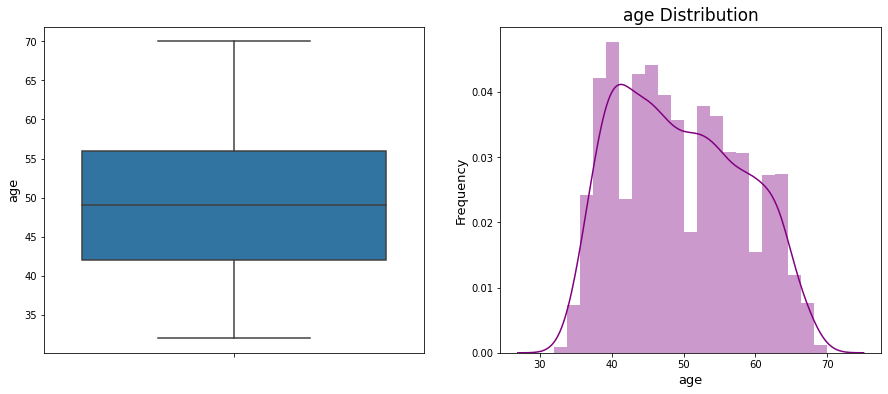

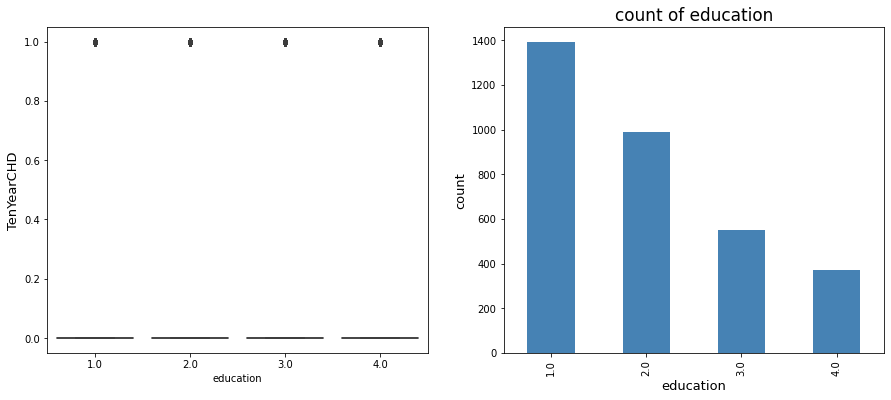

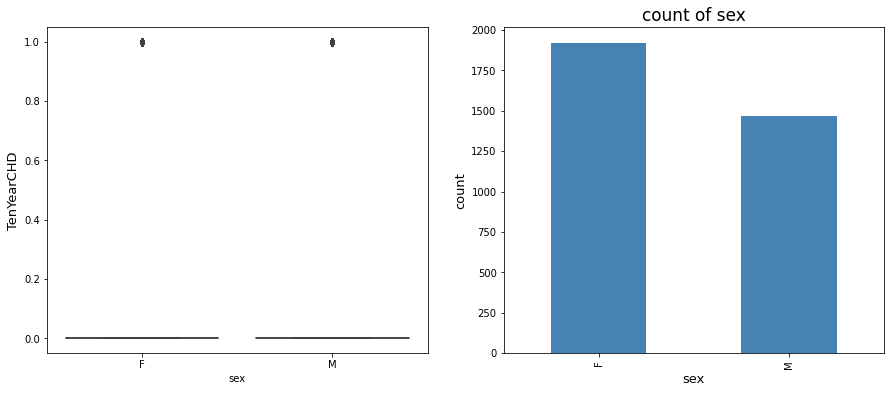

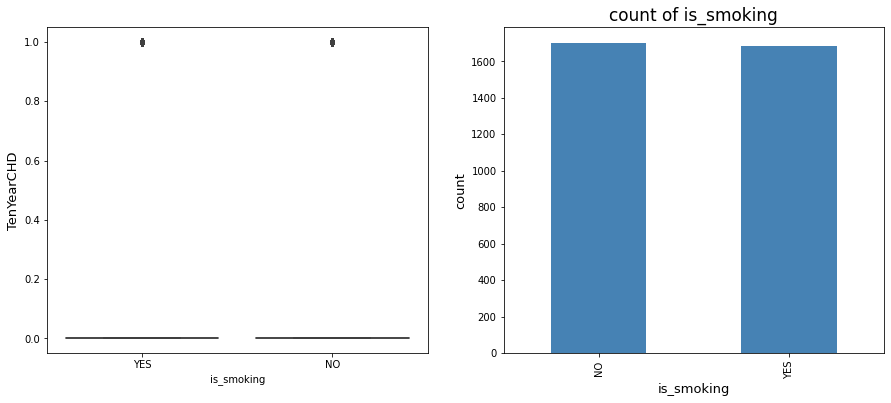

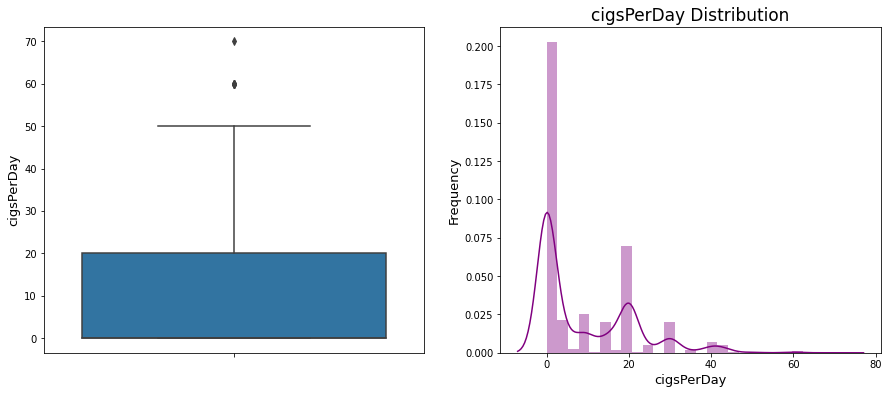

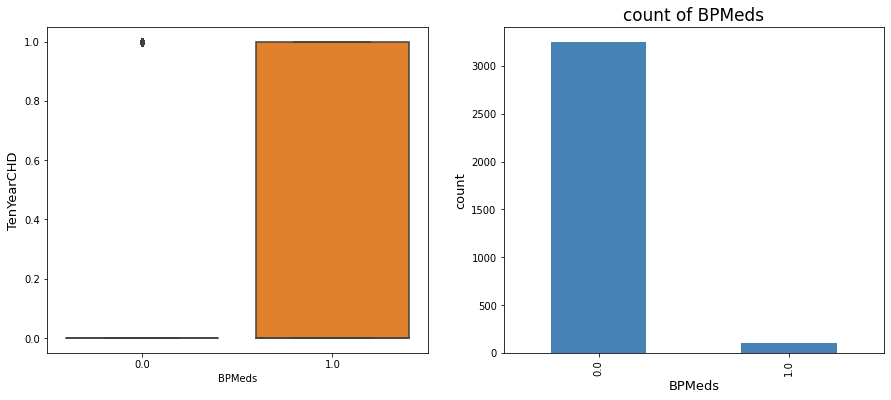

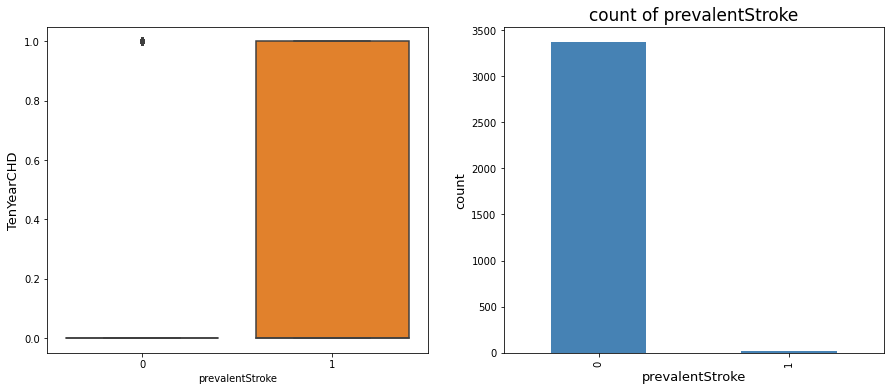

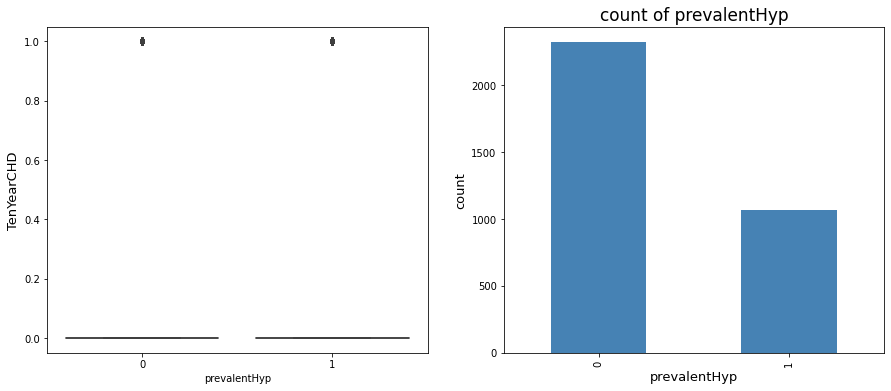

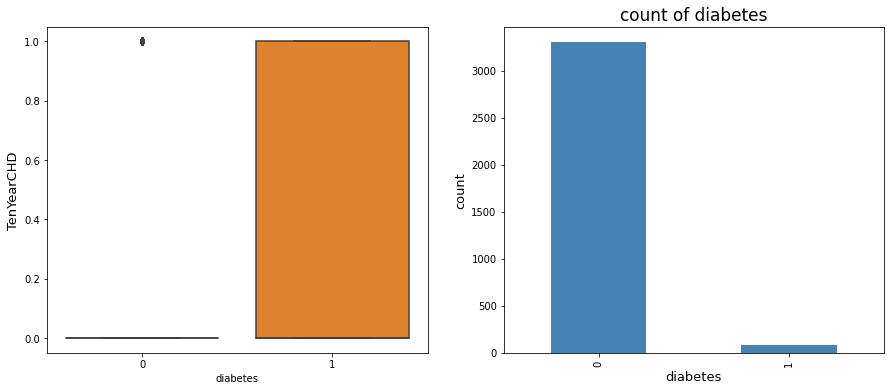

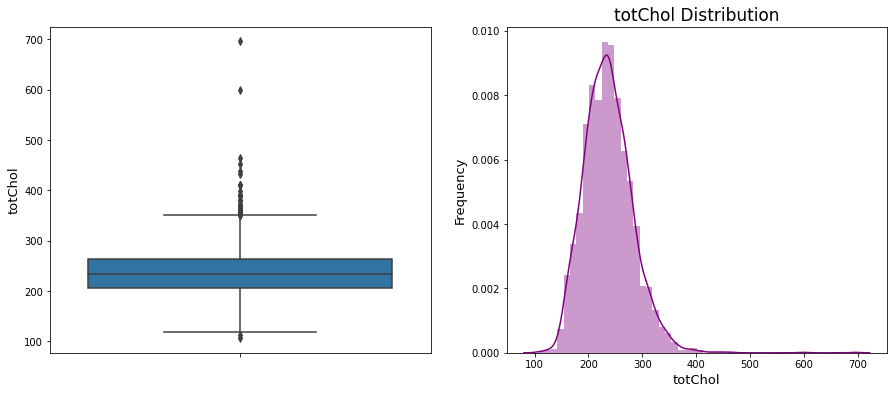

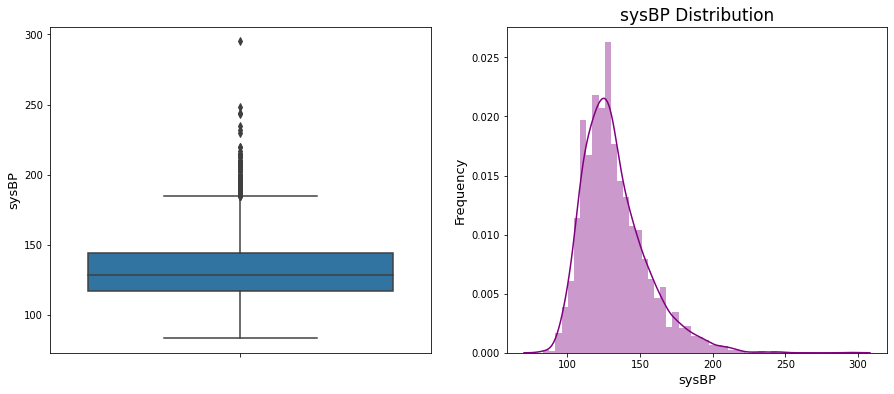

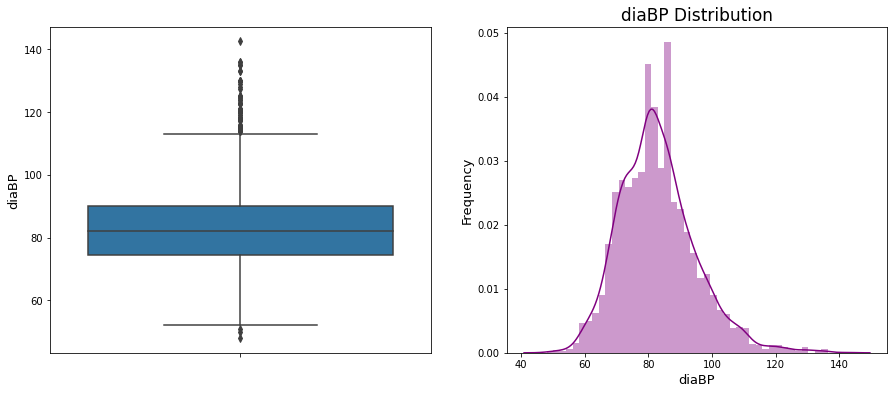

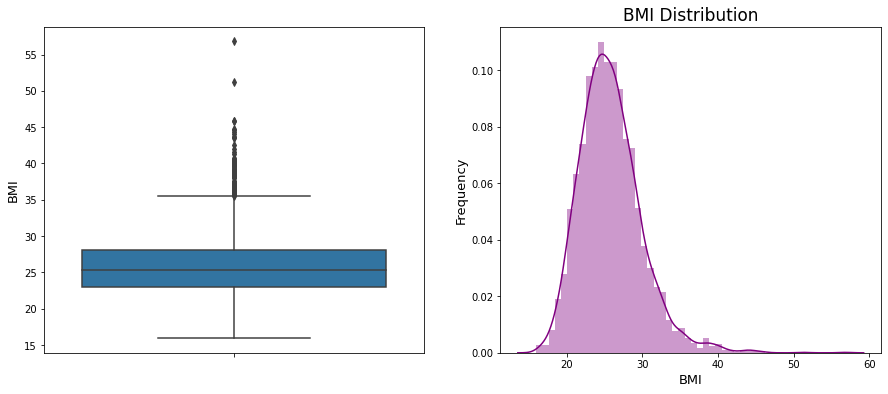

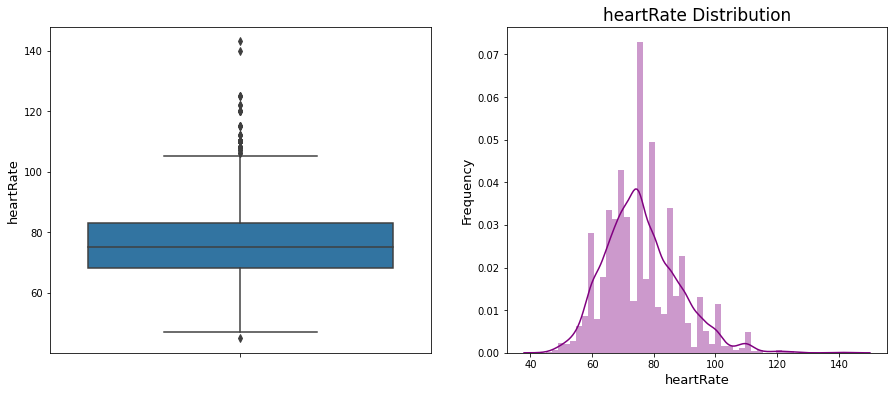

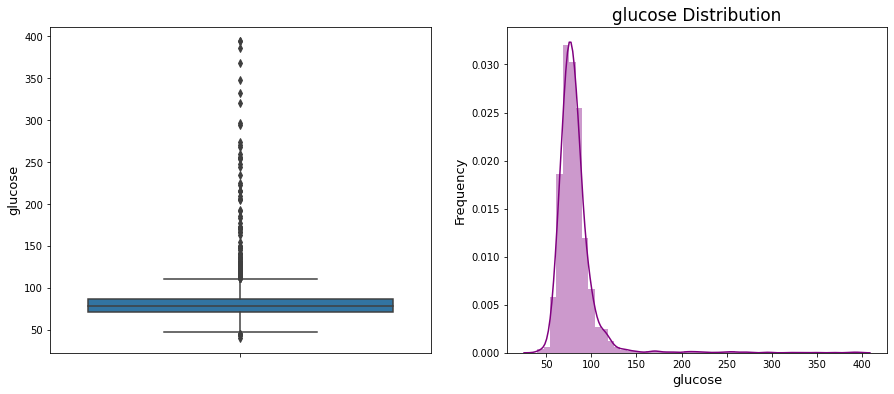

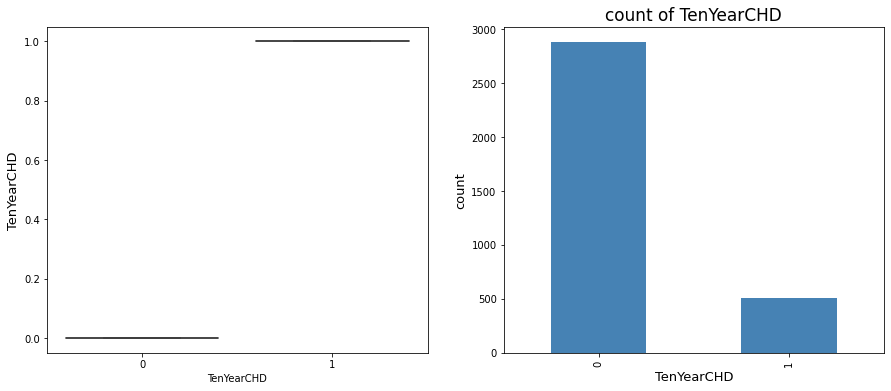

In [14]:
get_eda(df,'TenYearCHD')

In [311]:
df[(df['age']<50)&(df['prevalentHyp']==1)&(df['is_smoking']==1)&(df['totChol']>240)]

,age,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,Target
32,38,2.0,1,1,0.0,0,1,0,266.0,31.08,69.0,0
101,48,2.0,1,1,0.0,0,1,0,258.0,25.94,83.0,0
129,48,1.0,0,1,0.0,0,1,0,268.0,36.11,72.0,0
134,39,1.0,1,1,0.0,0,1,0,291.0,25.74,67.0,0
161,41,2.0,1,1,0.0,0,1,0,313.0,25.63,60.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3146,41,1.0,1,1,0.0,0,1,0,260.0,33.08,95.0,1
3201,48,4.0,1,1,0.0,0,1,0,259.0,20.72,102.0,1
3228,45,4.0,1,1,0.0,0,1,0,271.0,26.05,94.0,1
3236,49,2.0,0,1,1.0,0,1,0,350.0,18.44,110.0,0


In [312]:
df[(df['age']<50)&(df['prevalentHyp']==1)&(df['is_smoking']==1)&(df['totChol']>240)]['Target'].value_counts()

0    70
1    20
Name: Target, dtype: int64

### Feature Inspection

#### 'TenYearCHD'

The dataset is imbalanced

In [15]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [16]:
511/2879

0.17749218478638415

Maybe the algorithm can work around it and we don't need oversampling. 

####There are outliers in few features, but I suspect that these outliers are essential in determining the target feature.

Let's check!

In [17]:
# Build a function to get [box_plot and dist_plot for continuous values feature] and [box_plot and bar_plot for discrete plot]
def get_target_comp(df0,df1):
  for col in df0.columns:

    # Continuous features
    if len(df0[col].unique())>20:
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      fig = sns.distplot(df0[col].dropna(),color='purple')  # Dist plot
      fig.set_ylabel('Frequency',fontsize=13)
      fig.set_xlabel(col,fontsize=13)
      plt.title(f'{col} Distribution, target=0',fontsize=17)
      
      plt.subplot(1, 2, 2)
      fig = sns.distplot(df1[col].dropna(),color='purple')  # Dist plot
      fig.set_ylabel('Frequency',fontsize=13)
      fig.set_xlabel(col,fontsize=13)
      plt.title(f'{col} Distribution, target=1',fontsize=17)
      plt.show()

    # Categorical features
    else:
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      counts = df0[col].value_counts().sort_index()
      counts.plot.bar(color='steelblue')              # Bar plot
      plt.xlabel(col,fontsize=13)
      plt.ylabel('count',fontsize=13)
      plt.title(f'count of {col}, target=0',fontsize=17)

      plt.subplot(1, 2, 2)
      counts = df1[col].value_counts().sort_index()
      counts.plot.bar(color='steelblue')              # Bar plot
      plt.xlabel(col,fontsize=13)
      plt.ylabel('count',fontsize=13)
      plt.title(f'count of {col}, target=1',fontsize=17)
      plt.show()      

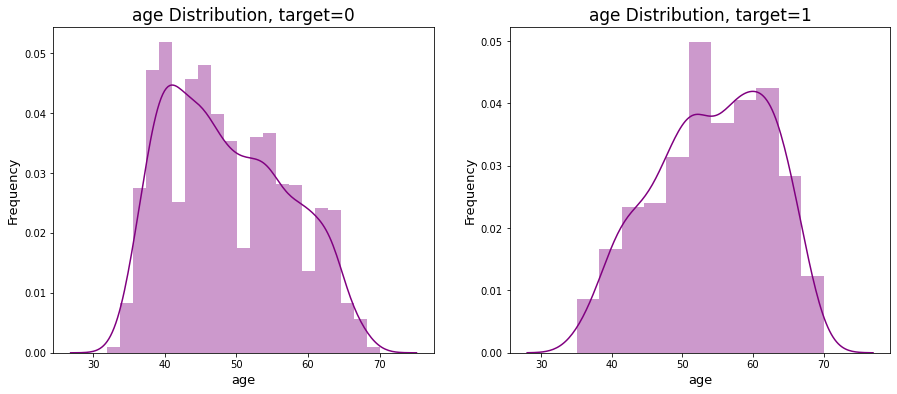

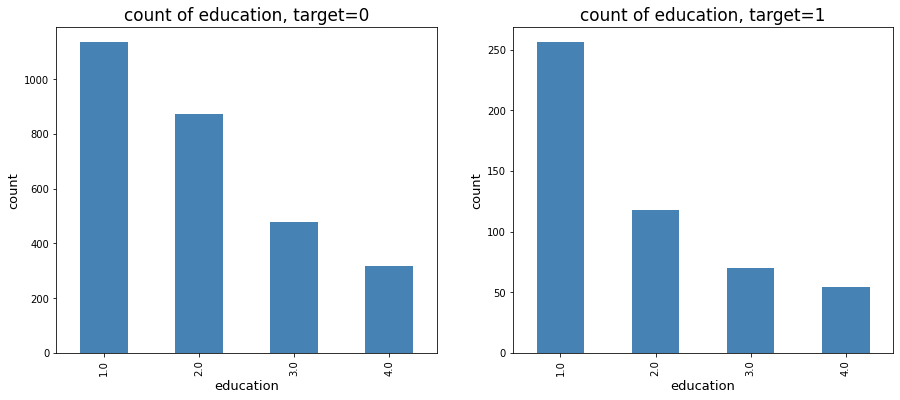

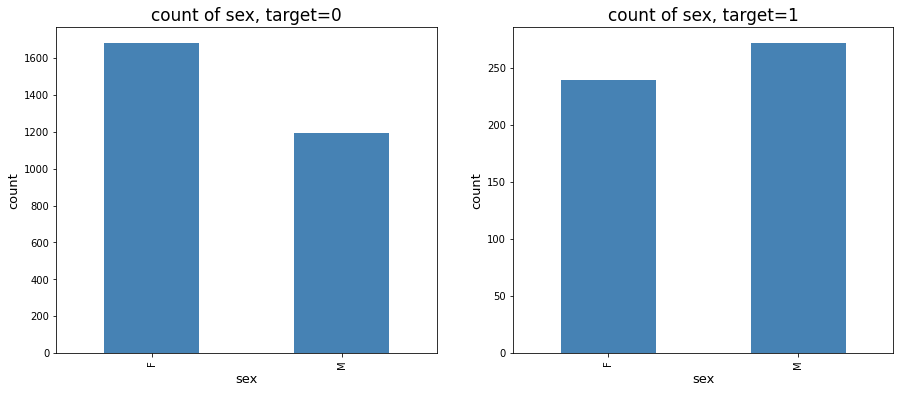

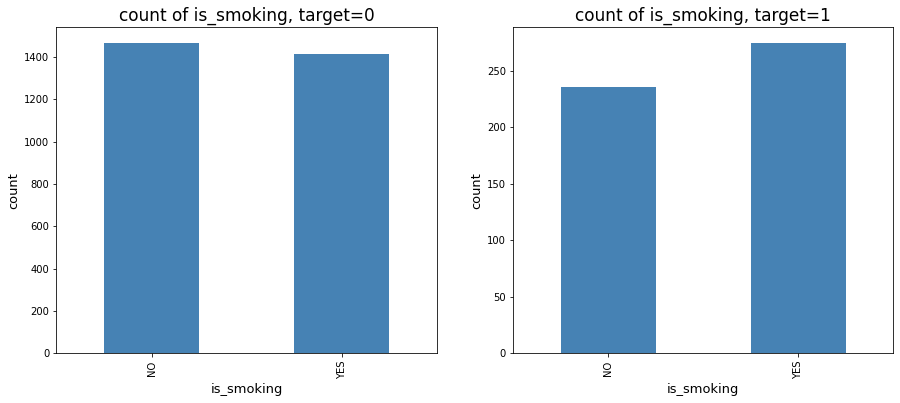

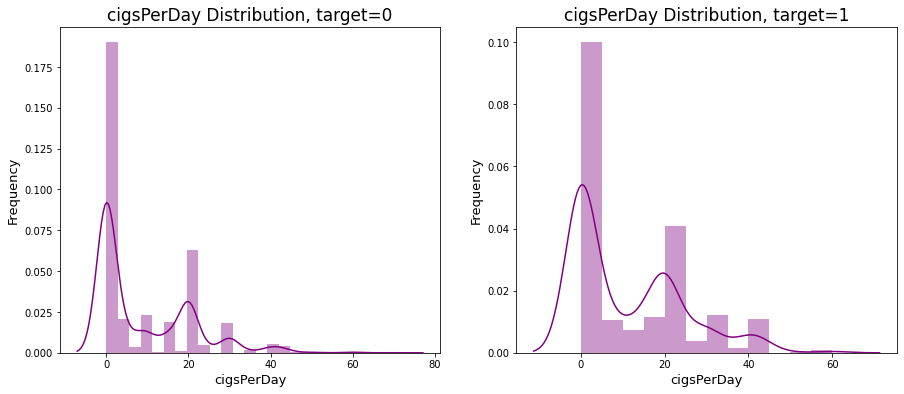

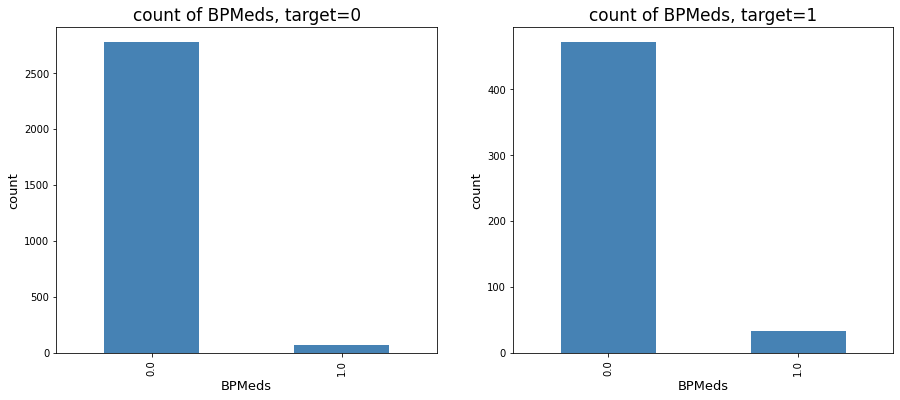

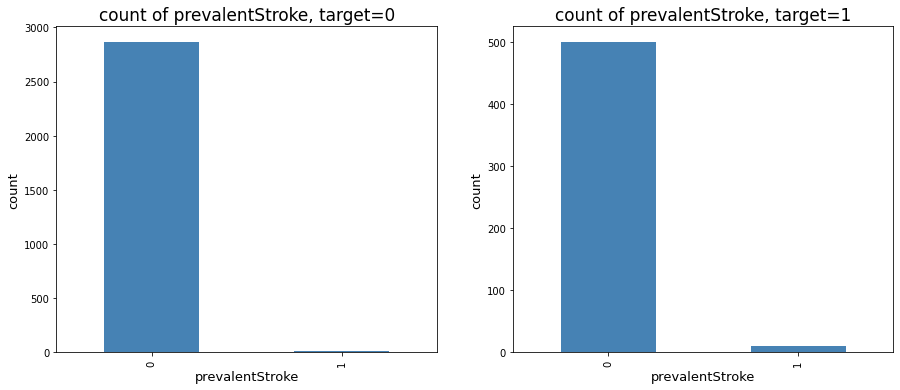

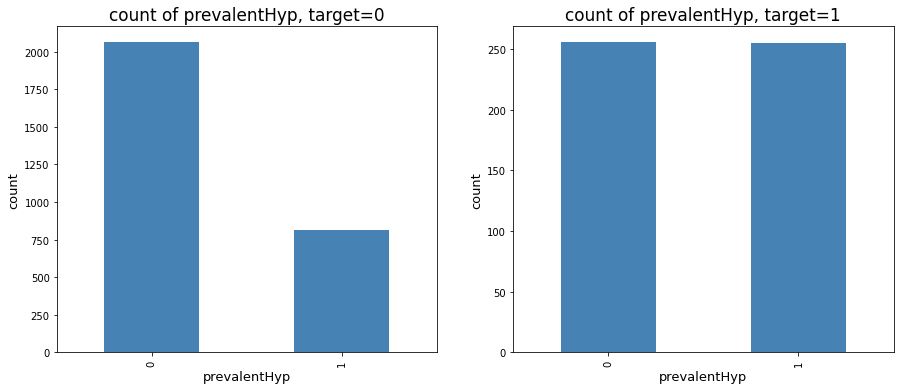

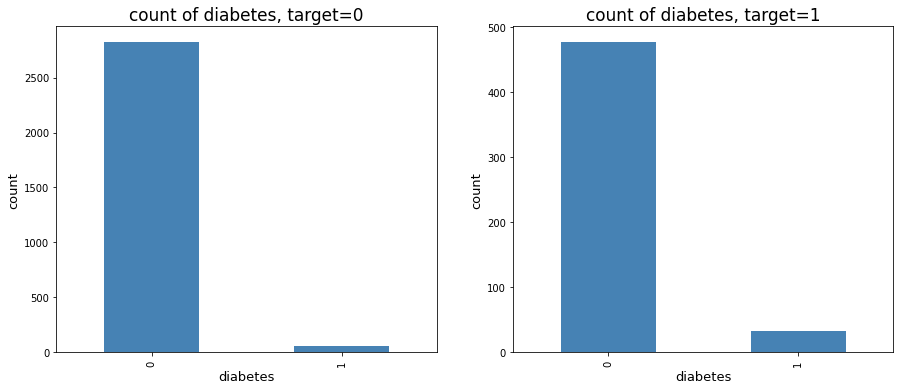

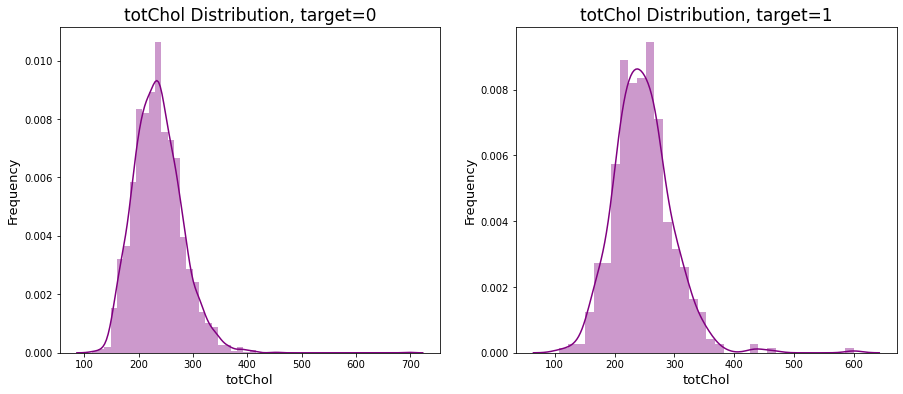

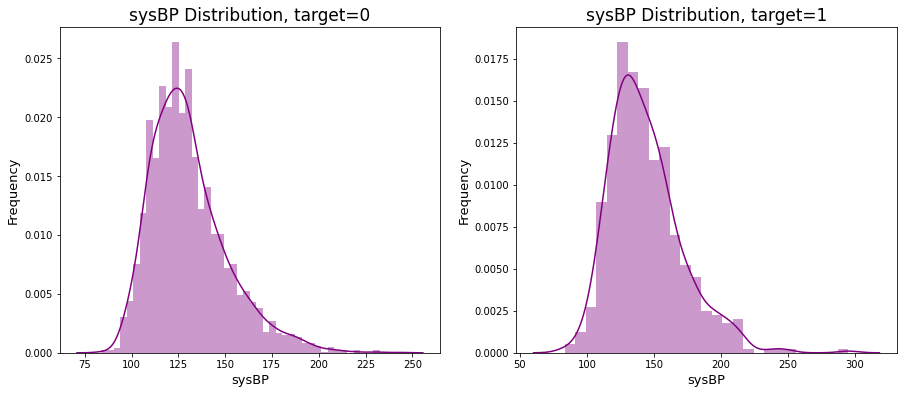

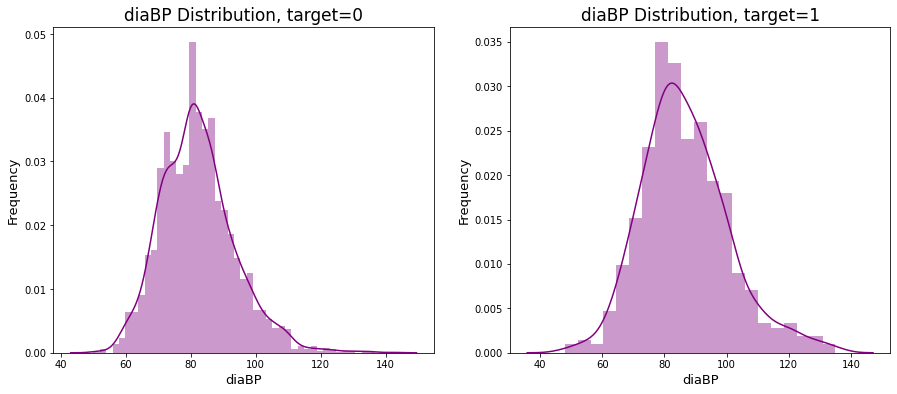

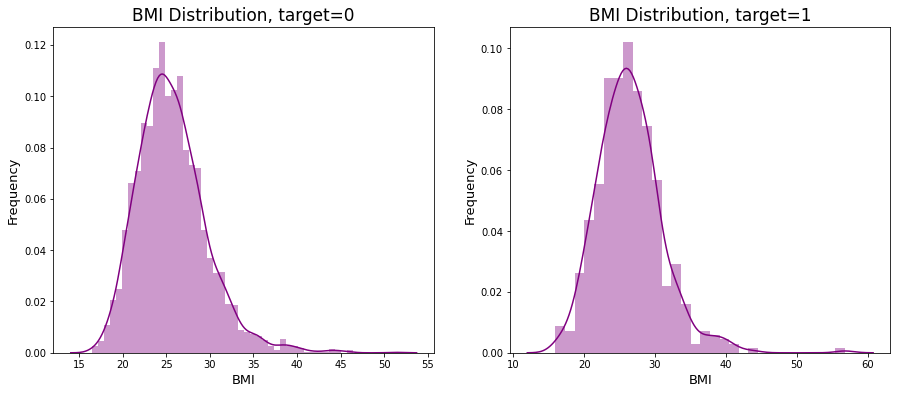

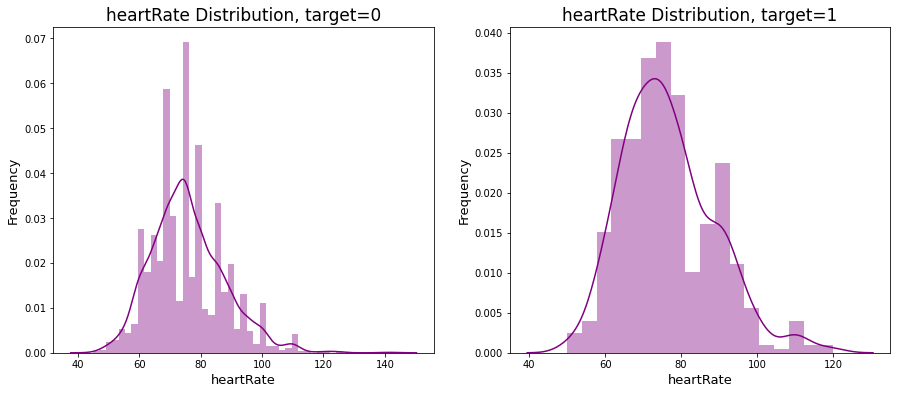

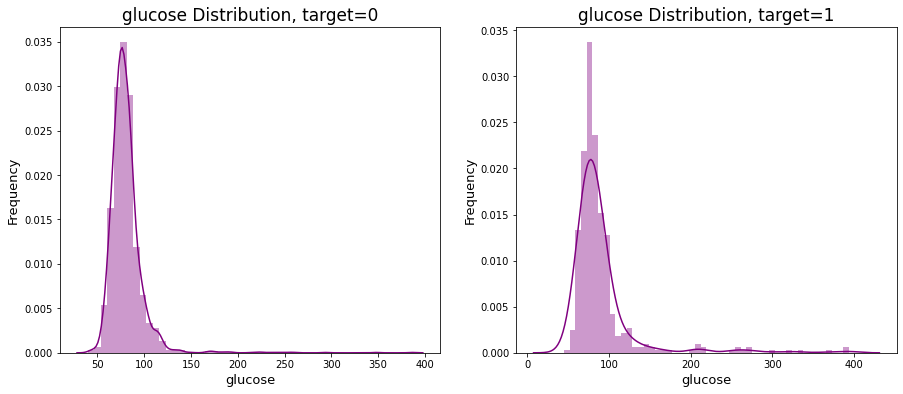

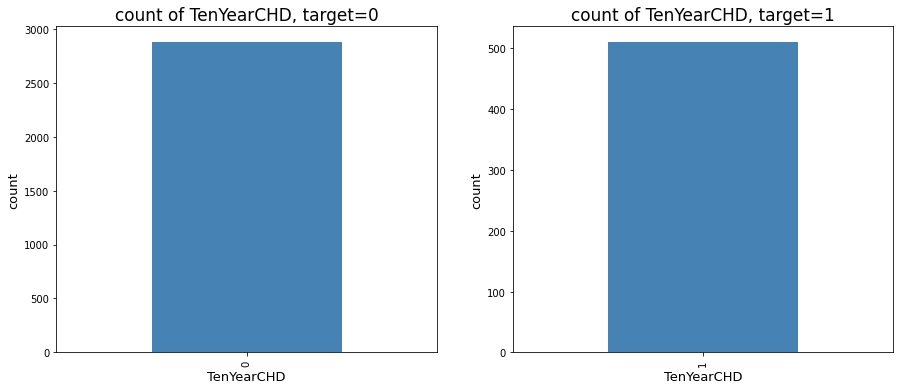

In [18]:
get_target_comp(df0=df[df['TenYearCHD']==0], df1=df[df['TenYearCHD']==1])

In [19]:
# 'cigsPerDay' feature has Upper Limit = 50
df[df['cigsPerDay']>50]['TenYearCHD'].value_counts()

0    7
1    2
Name: TenYearCHD, dtype: int64

In [20]:
# 'totChol' feature has Upper Limit = 350
df[df['totChol']>350]['TenYearCHD'].value_counts()

0    32
1    11
Name: TenYearCHD, dtype: int64

In [21]:
# 'sysBP' feature has Upper Limit = 180
df[df['sysBP']>180]['TenYearCHD'].value_counts()

0    82
1    49
Name: TenYearCHD, dtype: int64

In [22]:
# 'diaBP' feature has Upper Limit = 110
df[df['diaBP']>110]['TenYearCHD'].value_counts()

0    42
1    30
Name: TenYearCHD, dtype: int64

In [23]:
# 'BMI' feature has Upper Limit = 36
df[df['BMI']>36]['TenYearCHD'].value_counts()

0    53
1    17
Name: TenYearCHD, dtype: int64

In [24]:
# 'heartRate' feature has Upper Limit = 105
df[df['heartRate']>105]['TenYearCHD'].value_counts()

0    50
1    13
Name: TenYearCHD, dtype: int64

In [25]:
# 'glucose' feature has Upper Limit = 120
df[df['glucose']>120]['TenYearCHD'].value_counts()

0    42
1    39
Name: TenYearCHD, dtype: int64

* I conclude that outliers are essential in determining the target variable

## Handling missing/nan data

In [26]:
# This is one way to go about it
df_no_nan = df.dropna()
df_no_nan.reset_index(drop=True,inplace=True)
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2927 non-null   int64  
 1   education        2927 non-null   float64
 2   sex              2927 non-null   object 
 3   is_smoking       2927 non-null   object 
 4   cigsPerDay       2927 non-null   float64
 5   BPMeds           2927 non-null   float64
 6   prevalentStroke  2927 non-null   int64  
 7   prevalentHyp     2927 non-null   int64  
 8   diabetes         2927 non-null   int64  
 9   totChol          2927 non-null   float64
 10  sysBP            2927 non-null   float64
 11  diaBP            2927 non-null   float64
 12  BMI              2927 non-null   float64
 13  heartRate        2927 non-null   float64
 14  glucose          2927 non-null   float64
 15  TenYearCHD       2927 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 366.0+ KB


Or we can impute the missign values

In [27]:
# Missing Value Count Function for the dataframe
def show_missing(df):
    missing = df.columns[df.isnull().any()].tolist()

    # Missing data counts and percentage
    print('Missing Data Count')
    print(df[missing].isnull().sum().sort_values(ascending = False))
    print('--'*50)
    print('Missing Data Percentage')
    print(round(df[missing].isnull().sum().sort_values(ascending = False)/len(df)*100,2))
    return missing

In [28]:
show_missing(df)

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

* All the features with missing values can be easily treated in this case. Hence, keeping all the column

### 'glucose'
'glucose' a continuous feature is positively skewed. Hence, imputing median values inplace of nan values

In [29]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

### 'education'
'education' a discrete feature has mode of 1.0.

In [30]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

### 'totChol'
'totChol' a continuous feature is positively skewed. Hence, imputing median values inplace of nan values

In [31]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

### 'BPMeds'
'MPMeds' a discrete feature has mode of 0. But, it depends upon certain features so let's study it a further more and then take a decision

#### Finding 'BPMeds' dependencies

In [32]:
df[df['BPMeds'].isna()]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
102,68,2.0,F,NO,0.0,NaN,0,0,0,257.0,144.0,95.0,29.25,80.0,77.0,0
128,67,2.0,F,NO,0.0,NaN,0,0,0,261.0,117.0,63.0,22.55,75.0,83.0,0
174,60,1.0,F,NO,0.0,NaN,0,1,0,273.0,176.0,84.0,22.17,66.0,79.0,0
194,56,1.0,F,NO,0.0,NaN,0,1,0,391.0,126.0,84.0,24.83,80.0,78.0,0
265,41,1.0,F,NO,0.0,NaN,0,0,0,179.0,121.0,83.0,23.04,66.0,90.0,0
304,47,3.0,F,YES,9.0,NaN,0,0,0,221.0,127.5,75.0,23.78,69.0,73.0,0
656,37,3.0,F,NO,0.0,NaN,0,0,0,145.0,105.0,73.0,23.44,58.0,80.0,0
863,53,3.0,F,NO,0.0,NaN,0,0,0,252.0,122.5,75.5,25.29,75.0,71.0,0
864,40,2.0,F,NO,0.0,NaN,0,0,0,157.0,131.0,85.0,27.38,95.0,78.0,0


* Relate BPMeds with systolic BP

In [33]:
show_missing(df[df['BPMeds'].isna()])

Missing Data Count
BPMeds    44
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
BPMeds    100.0
dtype: float64


['BPMeds']

Needed to take care of 'totChol' first. That we did!

In [34]:
df[(df['BPMeds'].isna()) & (df['sysBP']>=170)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
174,60,1.0,F,NO,0.0,NaN,0,1,0,273.0,176.0,84.0,22.17,66.0,79.0,0
881,59,4.0,F,NO,0.0,NaN,0,1,0,240.0,195.0,118.0,23.82,80.0,73.0,0
923,52,1.0,F,NO,0.0,NaN,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0
1367,66,1.0,F,NO,0.0,NaN,0,1,1,203.0,205.0,83.0,28.27,75.0,118.0,1
1769,57,4.0,F,NO,0.0,NaN,0,1,0,328.0,181.0,112.5,27.05,85.0,94.0,1
2057,60,1.0,F,NO,0.0,NaN,0,1,0,231.0,174.0,110.0,25.05,85.0,82.0,0


#### Fill na

In [35]:
bpmeds1 = df[(df['BPMeds'].isna()) & (df['sysBP']>=170)].fillna(1)
bpmeds1

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
174,60,1.0,F,NO,0.0,1.0,0,1,0,273.0,176.0,84.0,22.17,66.0,79.0,0
881,59,4.0,F,NO,0.0,1.0,0,1,0,240.0,195.0,118.0,23.82,80.0,73.0,0
923,52,1.0,F,NO,0.0,1.0,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0
1367,66,1.0,F,NO,0.0,1.0,0,1,1,203.0,205.0,83.0,28.27,75.0,118.0,1
1769,57,4.0,F,NO,0.0,1.0,0,1,0,328.0,181.0,112.5,27.05,85.0,94.0,1
2057,60,1.0,F,NO,0.0,1.0,0,1,0,231.0,174.0,110.0,25.05,85.0,82.0,0


In [36]:
bpmeds0 = df[(df['BPMeds'].isna()) & (df['sysBP']<170)].fillna(0)
bpmeds0

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
8,41,2.0,F,YES,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
102,68,2.0,F,NO,0.0,0.0,0,0,0,257.0,144.0,95.0,29.25,80.0,77.0,0
128,67,2.0,F,NO,0.0,0.0,0,0,0,261.0,117.0,63.0,22.55,75.0,83.0,0
194,56,1.0,F,NO,0.0,0.0,0,1,0,391.0,126.0,84.0,24.83,80.0,78.0,0
265,41,1.0,F,NO,0.0,0.0,0,0,0,179.0,121.0,83.0,23.04,66.0,90.0,0
304,47,3.0,F,YES,9.0,0.0,0,0,0,221.0,127.5,75.0,23.78,69.0,73.0,0
656,37,3.0,F,NO,0.0,0.0,0,0,0,145.0,105.0,73.0,23.44,58.0,80.0,0
863,53,3.0,F,NO,0.0,0.0,0,0,0,252.0,122.5,75.5,25.29,75.0,71.0,0
864,40,2.0,F,NO,0.0,0.0,0,0,0,157.0,131.0,85.0,27.38,95.0,78.0,0
957,41,1.0,M,YES,15.0,0.0,0,0,0,198.0,114.5,80.0,22.53,72.0,75.0,0


#### Joining dataframes n droping nan rows fbased on 'BPMeds' column

In [37]:
df['BPMeds'].isna().sum()

44

In [38]:
frames = [df, bpmeds0, bpmeds1]

# join the dataframe
df = pd.concat(frames)

In [39]:
# Dropping the rowns having NaN/NaT values
# under certain label
df = df.dropna(subset=['BPMeds'])
 
# Resetting the indices using df.reset_index()
df = df.reset_index(drop=True)

In [40]:
df[(df['BPMeds'].isna()) & (df['sysBP']>=170)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [41]:
df.shape

(3390, 16)

In [42]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### 'cigsPerDay'
'cigsPerDay' a continuous feature is positively skewed. Hence, imputing median values inplace of nan values

In [43]:
df[df['cigsPerDay'].isna()]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
415,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
459,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
462,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,78.0,0
484,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
531,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
759,54,1.0,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1443,47,2.0,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1449,49,1.0,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1578,57,1.0,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1959,49,2.0,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [44]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

### 'BMI' and 'heartRate'
Both are continuous features with positively skewed distribution

In [45]:
df['BMI' ] = df['BMI' ].fillna(df['BMI' ].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

### Final check

In [46]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Feature encoding

In [47]:
# View the dataset
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [48]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [49]:
df['is_smoking'].unique()

array(['YES', 'NO'], dtype=object)

In [50]:
# Use a dictionary and replace function
encoders_nums = {
                  "sex":{"F":0,"M":1},
                 "is_smoking":{"YES":1,"NO":0}}

df = df.replace(encoders_nums)  

In [51]:
df = df.rename(columns={'TenYearCHD':'Target'})

In [52]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Target
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Great! Now we have all the data in numerical format

Next steps demands data to be in numerical format

## Get correlation heatmap

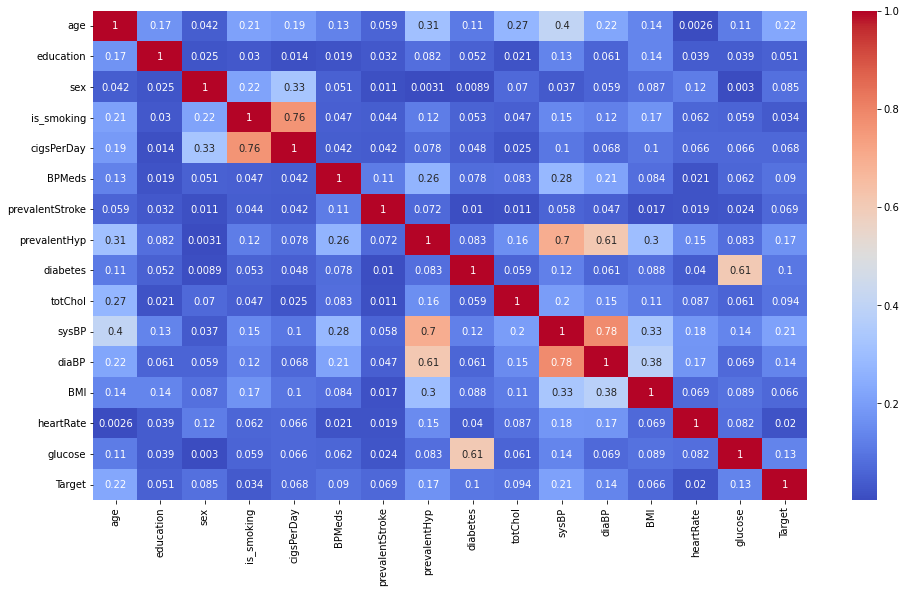

In [53]:
# Get the heatmap using seaborn.heatmap 
plt.figure(figsize=(16,9))
sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')

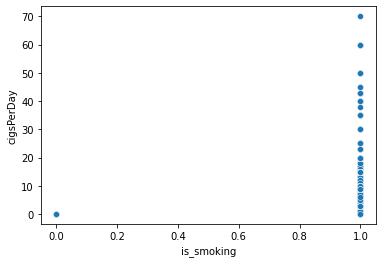

In [54]:
sns.scatterplot(data=df,x='is_smoking',y='cigsPerDay')

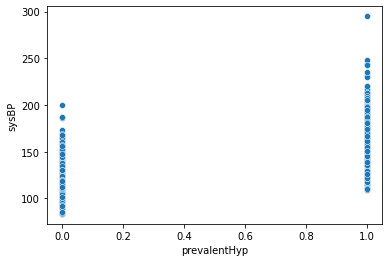

In [55]:
sns.scatterplot(data=df,x='prevalentHyp',y='sysBP')

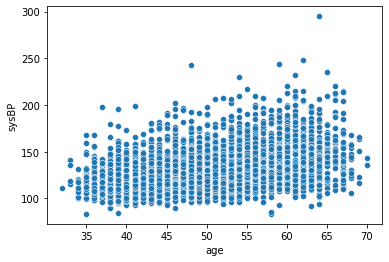

In [56]:
sns.scatterplot(data=df,x='age',y='sysBP')

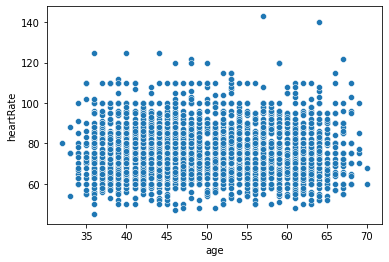

In [57]:
sns.scatterplot(data=df,x='age',y='heartRate')

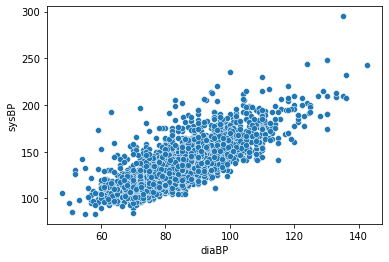

In [58]:
sns.scatterplot(data=df,x='diaBP',y='sysBP')

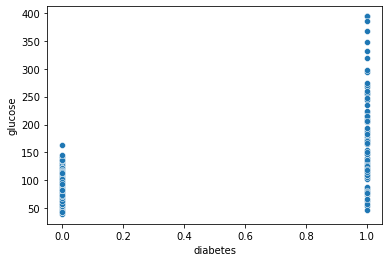

In [59]:
sns.scatterplot(data=df,x='diabetes',y='glucose')

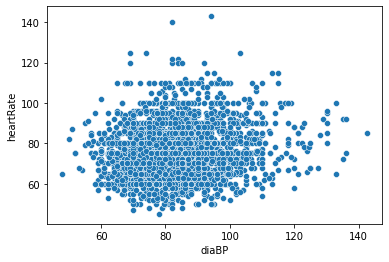

In [60]:
sns.scatterplot(data=df,x='diaBP',y='heartRate')

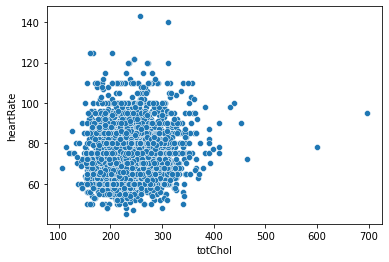

In [61]:
sns.scatterplot(data=df,x='totChol',y='heartRate')

### Multicollinearity check

In [62]:
# import variance_inflation_factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# Create a function to return VIF value for that feature
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame() # create a DataFrame where we will add feature and its respective vif value
    vif["variables"] = X.columns # Variable feature in vif dataframe will have columns from X i.e. input
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # vif value for that column 
    return(vif)

In [64]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Target']]])

,variables,VIF
0,age,41.227801
1,education,4.583835
2,sex,2.124046
3,is_smoking,4.835367
4,cigsPerDay,4.104052
5,BPMeds,1.145958
6,prevalentStroke,1.026035
7,prevalentHyp,2.408819
8,diabetes,1.584458
9,totChol,30.785367


We need to do feature engineering here, the multicollinearity will defintely be an issue.

### Sneak peek at feature importances
To check whether we can do feature selection since some of the features are having high vif values

In [65]:
!pip install skfeature-chappers

     |████████████████████████████████| 66 kB 2.8 MB/s 


In [66]:
def fisher_feature(df,x,y):
  from skfeature.function.similarity_based import fisher_score
  import matplotlib.pyplot as plt
  %matplotlib inline
  # Calculating Scores
  ranks= fisher_score.fisher_score(x,y)
  #plotting the ranks
  feat_importances= pd.Series(ranks,df.columns[0:len(df.columns)-1])
  feat_importances.sort_values(ascending=True).plot(kind='barh', color='teal')
  plt.show()

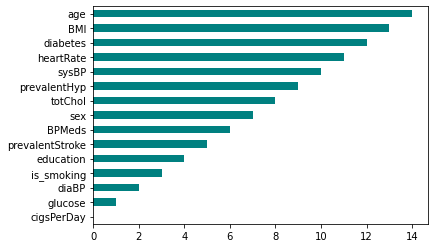

In [67]:
fisher_feature(df,df.drop('Target',axis=1).to_numpy(),df['Target']) # X.to_numpy() is important the length of both X and Y should be same

## <b><u>Feature Engineering

In [68]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Target
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Using fischer score, the feature comparison when target=0 and target=1 and some google info,
also here we have some redundant features,
I am choosing some features based on these intel.

cigarettes per day doesn't matter based on EDA, is_smoking is more important

sysBP and diaBP gives rise to prevalentHyp, hence only prevalentHyp is sufficient

glucose if redundant when diabetes is given

In [69]:
df.drop(['sysBP','diaBP','glucose','cigsPerDay'],axis=1,inplace=True)

In [70]:
df.head()

,age,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,Target
0,64,2.0,0,1,0.0,0,0,0,221.0,25.38,90.0,1
1,36,4.0,1,0,0.0,0,1,0,212.0,29.77,72.0,0
2,46,1.0,0,1,0.0,0,0,0,250.0,20.35,88.0,0
3,50,1.0,1,1,0.0,0,1,0,233.0,28.26,68.0,1
4,64,1.0,0,1,0.0,0,0,0,241.0,26.42,70.0,0


Also, let's keep categorical features

In [71]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Target']]])

,variables,VIF
0,age,32.824339
1,education,4.430836
2,sex,1.929635
3,is_smoking,2.203212
4,BPMeds,1.131145
5,prevalentStroke,1.025067
6,prevalentHyp,1.721448
7,diabetes,1.045917
8,totChol,29.900221
9,BMI,34.645225


Features with high vif were age, totchol, sysBP, diaBP, BMI, heartrate, glucose

* Features such as heartRate, totChol, sysBP, diaBP, age are the ones showing high vif value. Each one of them is unique and I have no way to find compound features from them.

Issue still remains

In [72]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Target','BMI','prevalentHyp','heartRate']]])

,variables,VIF
0,age,22.540623
1,education,4.209335
2,sex,1.841851
3,is_smoking,2.051520
4,BPMeds,1.063613
5,prevalentStroke,1.023933
6,diabetes,1.044181
7,totChol,24.106558


# <b><u>Build ML models

## Pre-processing

###train_test_split

In [435]:
df.head()

,age,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,Target
0,64,2.0,0,1,0.0,0,0,0,221.0,25.38,90.0,1
1,36,4.0,1,0,0.0,0,1,0,212.0,29.77,72.0,0
2,46,1.0,0,1,0.0,0,0,0,250.0,20.35,88.0,0
3,50,1.0,1,1,0.0,0,1,0,233.0,28.26,68.0,1
4,64,1.0,0,1,0.0,0,0,0,241.0,26.42,70.0,0


In [436]:
from sklearn.preprocessing import MinMaxScaler

In [437]:
scalar = MinMaxScaler()

In [438]:
X = pd.DataFrame(scalar.fit_transform(df.drop('Target',axis=1)),columns=df.drop('Target',axis=1).columns)

y = df['Target']

In [439]:
X.head()

,age,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate
0,0.842105,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.193548,0.230656,0.459184
1,0.105263,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.178268,0.338149,0.275510
2,0.368421,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.242784,0.107493,0.438776
3,0.473684,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.213922,0.301175,0.234694
4,0.842105,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.227504,0.256121,0.255102


In [440]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state=0)

# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(2712, 11) (2712,)
(678, 11) (678,)


In [441]:
y_train.value_counts()

0    2314
1     398
Name: Target, dtype: int64

In [442]:
y_test.value_counts()

0    565
1    113
Name: Target, dtype: int64

### Importing all the libraries needed

In [443]:
# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [444]:
# Since we need to select the best model out of four, using BayesSeachCV
!pip install scikit-optimize

In [445]:
# Complex model will be interpreted with SHAP. Install shap 
!pip install shap

In [446]:
from skopt import BayesSearchCV
import time
import shap

### Creating functions to reduce number of lines of code

### individual_model_performance(model_name,X_train,X_test,y_train,y_test)

In [447]:
# Get the accuracy score for the model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

### get_confusion_matrix(model_name, X_train, X_test, y_train, y_test)

In [448]:
# Get the confusion matrix for both train and test
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

## <b><u>Logistic regression model 

### WIthout regularization

In [449]:
# Fitting the LogisticRegression on train data
clf = LogisticRegression(fit_intercept=True)
clf.fit(X_train, y_train)

LogisticRegression()

In [450]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [451]:
clf.score(X_train, y_train) , clf.score(X_test, y_test)

(0.8565634218289085, 0.8377581120943953)

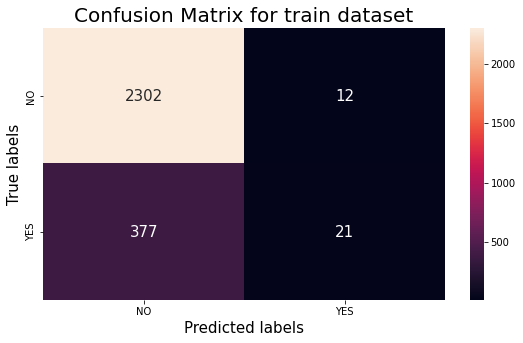

In [452]:
get_confusion_matrix(clf,X_train,y_train,'train')

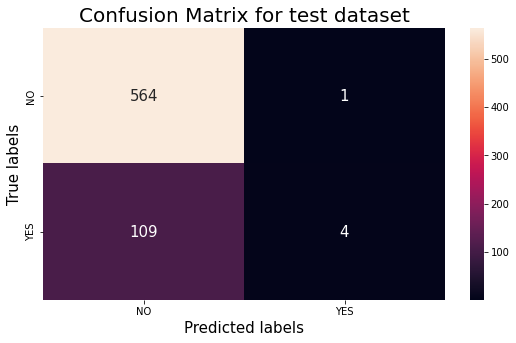

In [453]:
get_confusion_matrix(clf,X_test,y_test,'test')

In [454]:
clf.intercept_

array([-4.20402786])

In [455]:
# View the coefficient values
def feature_coefficients(model_name,X):
  labels = df.drop('Target',axis=1).columns
  coef = pd.DataFrame(list(zip(labels,model_name.coef_[0])),columns=['Features','Coef'])
  coef['Absolute coef'] = abs(coef['Coef'])
  coef.sort_values('Absolute coef',ascending=False,inplace=True)
  return coef.reset_index(drop=True)

In [456]:
feature_coefficients(clf,X_train)

,Features,Coef,Absolute coef
0,age,2.391046,2.391046
1,prevalentStroke,1.124340,1.124340
2,diabetes,0.882653,0.882653
3,totChol,0.822848,0.822848
4,prevalentHyp,0.595310,0.595310
5,sex,0.575640,0.575640
6,is_smoking,0.481011,0.481011
7,BMI,0.463647,0.463647
8,BPMeds,0.447010,0.447010
9,heartRate,0.405018,0.405018


In [457]:
# Get model performance using function I built, model_performance
individual_model_performance(clf,X_train,X_test,y_train,y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.097448,0.067797
1,Accuracy,0.856563,0.837758
2,Recall,0.052764,0.035398
3,Precision,0.636364,0.800000
4,log_loss,4.954127,5.603637
5,roc_auc,0.523789,0.516814


It's a poor model 

### With lasso regularization

In [458]:
start = time. time()

lasso = LogisticRegression(penalty='l1',solver='liblinear', fit_intercept=True, max_iter=10000)

lasso_bayes = BayesSearchCV(estimator=lasso, search_spaces={'C':(0.0001,10)}, n_iter=30, cv = 3, verbose=2, scoring='recall')

# Fit the data
lasso_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ................................C=2.014634123112845; total time=   0.0s
[CV] END ................................C=2.014634123112845; total time=   0.0s
[CV] END ................................C=2.014634123112845; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................C=9.93145981053432; total time=   0.0s
[CV] END .................................C=9.93145981053432; total time=   0.0s
[CV] END .................................C=9.93145981053432; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ................................C=4.638720403534556; total time=   0.0s
[CV] END ................................C=4.638720403534556; total time=   0.0s
[CV] END ................................C=4.638720403534556; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ..........................

In [468]:
lasso_bayes.best_estimator_

LogisticRegression(C=9.93145981053432, max_iter=10000, penalty='l1',
                   solver='liblinear')

In [469]:
lasso_bayes_optimal = LogisticRegression(C=9.93145981053432, max_iter=10000, penalty='l1',
                   solver='liblinear')

lasso_bayes_optimal.fit(X_train,y_train)

LogisticRegression(C=9.93145981053432, max_iter=10000, penalty='l1',
                   solver='liblinear')

#### Performance check

In [470]:
lasso_bayes_optimal.score(X_train,y_train), lasso_bayes_optimal.score(X_test,y_test)

(0.8569321533923304, 0.8377581120943953)

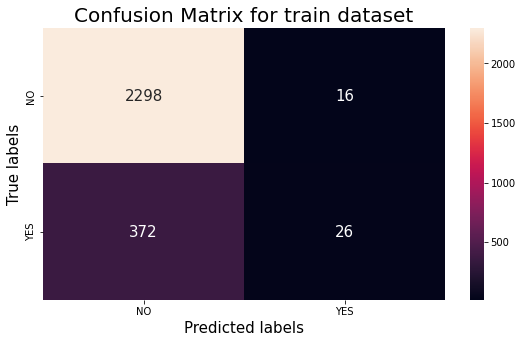

In [471]:
get_confusion_matrix(lasso_bayes_optimal,X_train,y_train,'train')

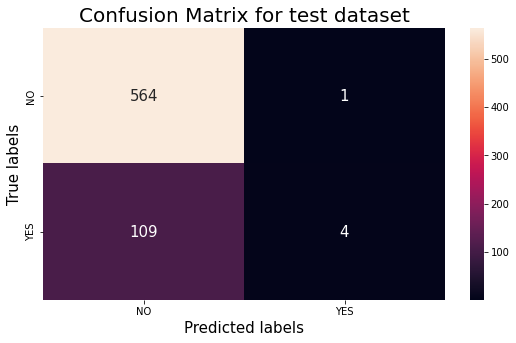

In [472]:
get_confusion_matrix(lasso_bayes_optimal,X_test,y_test,'test')

In [473]:
feature_coefficients(lasso_bayes_optimal,X_train)

,Features,Coef,Absolute coef
0,age,2.545011,2.545011
1,prevalentStroke,1.382663,1.382663
2,totChol,1.144590,1.144590
3,diabetes,0.916967,0.916967
4,sex,0.590648,0.590648
5,prevalentHyp,0.570072,0.570072
6,BMI,0.564784,0.564784
7,is_smoking,0.506961,0.506961
8,heartRate,0.465533,0.465533
9,BPMeds,0.447779,0.447779


In [474]:
# Get model performance using function I built, model_performance
individual_model_performance(lasso_bayes_optimal,X_train,X_test,y_train,y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.118182,0.067797
1,Accuracy,0.856932,0.837758
2,Recall,0.065327,0.035398
3,Precision,0.619048,0.800000
4,log_loss,4.941393,5.603637
5,roc_auc,0.529206,0.516814


## <b><u>Random Forest Classifier model

### Training a Random Forest Classifier

In [475]:
rf_model = RandomForestClassifier(max_depth=50, min_samples_leaf=10,min_samples_split=10,n_jobs=2)
rf_model.fit(X_train,y_train)
clf.score(X_train, y_train) , clf.score(X_test, y_test)

(0.8565634218289085, 0.8377581120943953)

In [476]:
start = time. time()

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()
# Grid search
rf_bayes= BayesSearchCV(estimator=rf_model,
                       search_spaces = {'max_depth': (5,50),
                                    'min_samples_leaf': (5,150),
                                    'min_samples_split': (5,150)}, n_iter=50,
                       cv = 3, verbose=2, scoring='recall')
# Fit the data
rf_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=36, min_samples_leaf=141, min_samples_split=134; total time=   0.2s
[CV] END max_depth=36, min_samples_leaf=141, min_samples_split=134; total time=   0.2s
[CV] END max_depth=36, min_samples_leaf=141, min_samples_split=134; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=29, min_samples_leaf=15, min_samples_split=122; total time=   0.2s
[CV] END max_depth=29, min_samples_leaf=15, min_samples_split=122; total time=   0.2s
[CV] END max_depth=29, min_samples_leaf=15, min_samples_split=122; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=18, min_samples_leaf=8, min_samples_split=90; total time=   0.2s
[CV] END max_depth=18, min_samples_leaf=8, min_samples_split=90; total time=   0.2s
[CV] END max_depth=18, min_samples_leaf=8, min_samples_split=90; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 

In [477]:
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=36, min_samples_leaf=141,
                       min_samples_split=134)

In [478]:
rf_bayes_optimal = RandomForestClassifier(max_depth=36, min_samples_leaf=141,
                       min_samples_split=134)
rf_bayes_optimal.fit(X_train,y_train)

RandomForestClassifier(max_depth=36, min_samples_leaf=141,
                       min_samples_split=134)

### Performance check

In [479]:
rf_bayes_optimal.score(X_train,y_train),rf_bayes_optimal.score(X_test,y_test)

(0.8532448377581121, 0.8333333333333334)

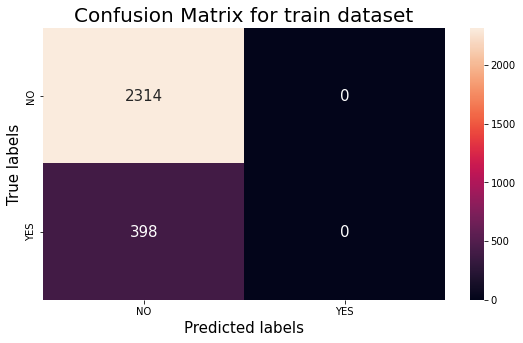

In [480]:
get_confusion_matrix(rf_bayes_optimal,X_train,y_train,'train')

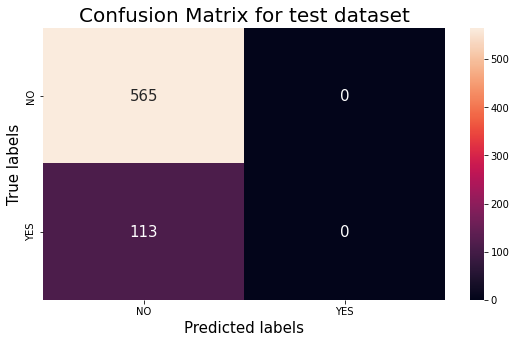

In [481]:
get_confusion_matrix(rf_bayes_optimal,X_test,y_test,'test')

In [482]:
individual_model_performance(rf_bayes_optimal, X_train, X_test, y_train, y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.000000,0.000000
1,Accuracy,0.853245,0.833333
2,Recall,0.000000,0.000000
3,Precision,0.000000,0.000000
4,log_loss,5.068744,5.756463
5,roc_auc,0.500000,0.500000


In [483]:
def get_feature_importance(model_name,X_train):
  importances = model_name.feature_importances_

  importance_dict = {'Feature' : df.drop('Target',axis=1).columns,
                    'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],3)
  importance_df.sort_values('Feature Importance',ascending=False,inplace =True)
  importance_df.reset_index(drop=True,inplace=True)
  return importance_df[importance_df['Feature Importance']>0]

In [484]:
rf_feature_importance = get_feature_importance(rf_bayes_optimal,X_train)
rf_feature_importance

,Feature,Feature Importance
0,age,0.403
1,prevalentHyp,0.259
2,sex,0.104
3,BMI,0.080
4,totChol,0.063
5,education,0.047
6,heartRate,0.026
7,is_smoking,0.018


### Model Interpretation

#### Summary Plot - Impact of features on predictions at global level

In [489]:
def get_summary_plot(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values[1], X_importance)

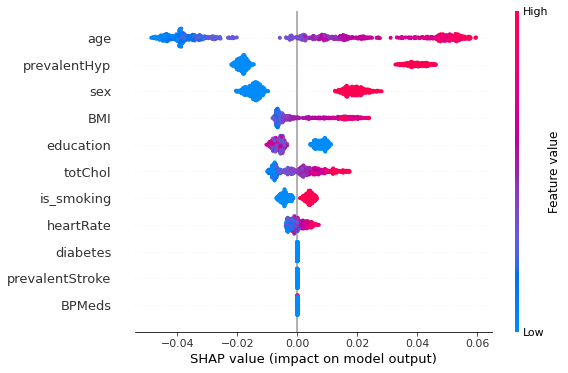

In [490]:
get_summary_plot(rf_bayes_optimal,X_test)

In [491]:
 def get_summary_bar_plot(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values[1], X_importance, plot_type='bar') 

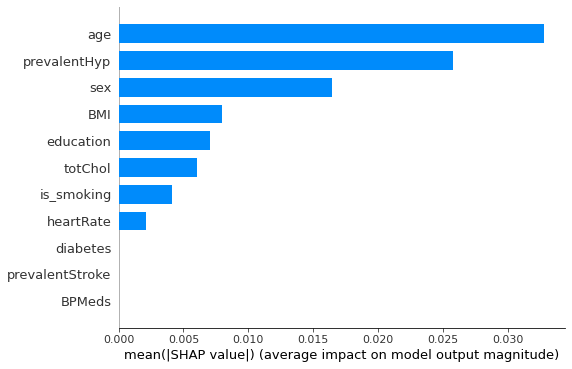

In [492]:
get_summary_bar_plot(rf_bayes_optimal,X_test)

## <b><u>XGBClassifier model

### Training a XGB Classifier

In [497]:
start = time. time()

# Create an instance of the RandomForestClassifier
xgb_model = XGBClassifier(subsample=0.9, colsample_bytree =0.4,random_state=0)

# Grid search
xgb_bayes= BayesSearchCV(estimator=xgb_model,
                       search_spaces = {'max_depth': (5,25),
                                    'min_samples_weight': (0.9,1),
                                    'reg_alpha':(0.1,10), 'gamma':(0.1,1)}, n_iter=50,
                       cv = 4, verbose=2, scoring='recall')
# Fit the data
xgb_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END gamma=0.45407338797144026, max_depth=13, min_samples_weight=0.9388407573385739, reg_alpha=2.653876651615407; total time=   0.4s
[CV] END gamma=0.45407338797144026, max_depth=13, min_samples_weight=0.9388407573385739, reg_alpha=2.653876651615407; total time=   0.4s
[CV] END gamma=0.45407338797144026, max_depth=13, min_samples_weight=0.9388407573385739, reg_alpha=2.653876651615407; total time=   0.3s
[CV] END gamma=0.45407338797144026, max_depth=13, min_samples_weight=0.9388407573385739, reg_alpha=2.653876651615407; total time=   0.4s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END gamma=0.1528869416604078, max_depth=13, min_samples_weight=0.9254112820583258, reg_alpha=6.167689406819981; total time=   0.3s
[CV] END gamma=0.1528869416604078, max_depth=13, min_samples_weight=0.9254112820583258, reg_alpha=6.167689406819981; total time=   0.3s
[CV] END gamma=0.1528869416604078, max_depth=13, min_samples_w

In [498]:
xgb_bayes.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.11204668614823413, max_depth=15,
              min_samples_weight=0.999178195468898,
              reg_alpha=0.22482051018524696, subsample=0.9)

In [499]:
xgb_bayes_optimal = XGBClassifier(colsample_bytree=0.4, gamma=0.11204668614823413, max_depth=15,
              min_samples_weight=0.999178195468898,
              reg_alpha=0.22482051018524696, subsample=0.9)
xgb_bayes_optimal.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.11204668614823413, max_depth=15,
              min_samples_weight=0.999178195468898,
              reg_alpha=0.22482051018524696, subsample=0.9)

### Performance check

In [500]:
xgb_bayes_optimal.score(X_train,y_train),xgb_bayes_optimal.score(X_test,y_test)

(0.9605457227138643, 0.8259587020648967)

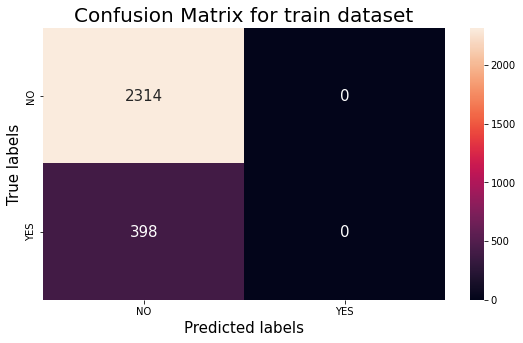

In [501]:
get_confusion_matrix(rf_bayes_optimal,X_train,y_train,'train')

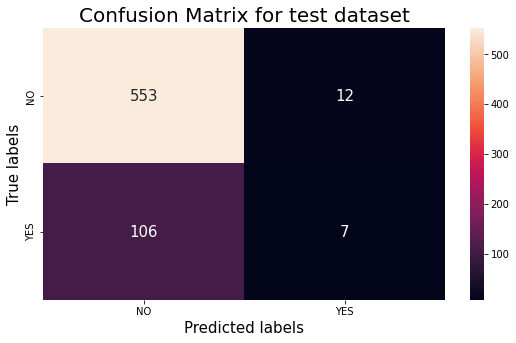

In [502]:
get_confusion_matrix(xgb_bayes_optimal,X_test,y_test,'test')

In [503]:
individual_model_performance(xgb_bayes_optimal, X_train, X_test, y_train, y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.844702,0.106061
1,Accuracy,0.960546,0.825959
2,Recall,0.731156,0.061947
3,Precision,1.000000,0.368421
4,log_loss,1.362702,6.011188
5,roc_auc,0.865578,0.520354


In [504]:
xgb_feature_importance = get_feature_importance(xgb_bayes_optimal,X_train)
xgb_feature_importance

,Feature,Feature Importance
0,prevalentStroke,0.156
1,diabetes,0.122
2,BPMeds,0.117
3,prevalentHyp,0.114
4,sex,0.113
5,age,0.085
6,BMI,0.067
7,heartRate,0.059
8,education,0.057
9,is_smoking,0.057


### Model Interpretation

#### Functions for shap plots


In [505]:
def get_force_plot_for1ob_BT(model_name,X_test):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model_name)
  # obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[0])

  # explainer.expected_value[0] means mean probability for 0,  shap_values[0] means shape values for class 0 
  plot = shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0]) 
  return plot

In [506]:
def get_force_plot_for100ob_BT(model_name,X_test):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model_name)
  # obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[:100])

  # explainer.expected_value[0] means mean probability for 0,  shap_values[0] means 
  plot = shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:100]) 
  return plot

In [507]:
def get_summary_plot_BT(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance)

In [508]:
 def get_summary_bar_plot_BT(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance, plot_type='bar') 

#### Force Plot - to view features contribution in prediction at local level

a) Force plot for 1 observation

In [509]:
get_force_plot_for1ob_BT(xgb_bayes_optimal,X_test)

b) Force plot of 100 observations

In [510]:
get_force_plot_for100ob_BT(xgb_bayes_optimal,X_test)

#### Summary Plot - Impact of features on predictions at global level

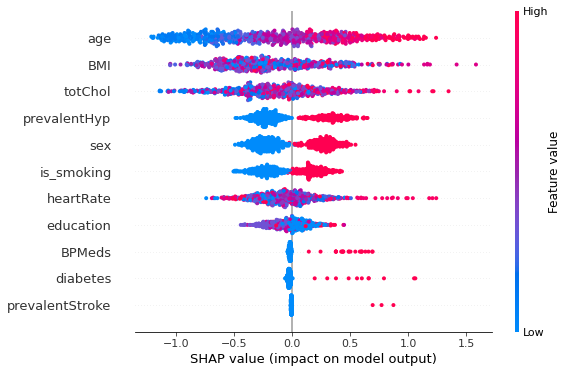

In [511]:
get_summary_plot_BT(xgb_bayes_optimal,X_test)

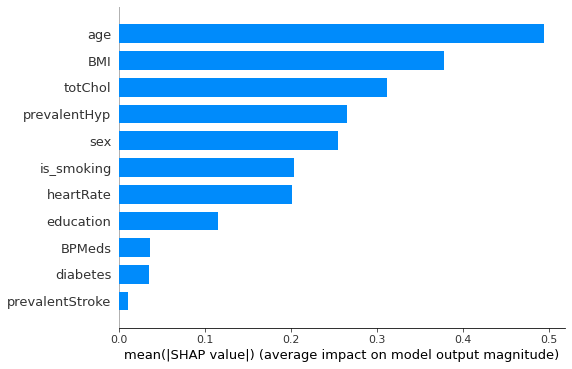

In [512]:
get_summary_bar_plot_BT(xgb_bayes_optimal,X_test)

## Support vector machine model

### Without regularization

In [513]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))

ROCAUC score: 0.6194690265486726
Accuracy score: 0.6194690265486725


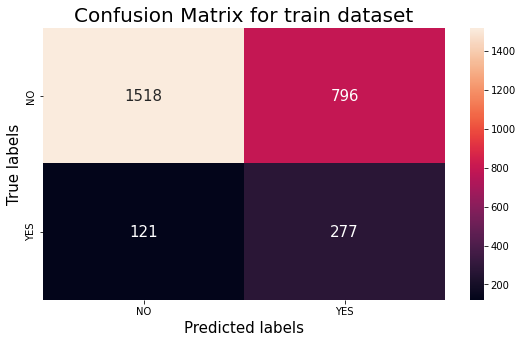

In [514]:
get_confusion_matrix(svc_model,X_train,y_train,'train')

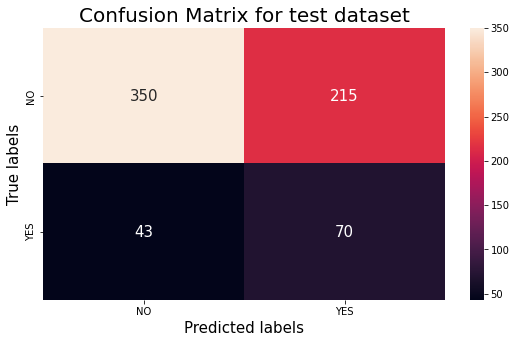

In [515]:
get_confusion_matrix(svc_model,X_test,y_test,'test')

In [516]:
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, svc_model.predict(X_train)))
print("\n")
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      2314
           1       0.26      0.70      0.38       398

    accuracy                           0.66      2712
   macro avg       0.59      0.68      0.57      2712
weighted avg       0.83      0.66      0.71      2712



              precision    recall  f1-score   support

           0       0.89      0.62      0.73       565
           1       0.25      0.62      0.35       113

    accuracy                           0.62       678
   macro avg       0.57      0.62      0.54       678
weighted avg       0.78      0.62      0.67       678



### Best SVM model

In [517]:
start = time. time()

# Create an instance of the RandomForestClassifier
svm = SVC(class_weight='balanced', probability=True)

# Grid search
svm_bayes= BayesSearchCV(estimator=svm,
                       search_spaces = {'kernel':['linear','rbf'],'C': (0.0001,10),
                                    'gamma': (0.1,1)}, n_iter=50,
                       cv = 4, verbose=2, scoring='recall')
# Fit the data
svm_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END C=0.712358895835929, gamma=0.5446108683904812, kernel=linear; total time=   0.7s
[CV] END C=0.712358895835929, gamma=0.5446108683904812, kernel=linear; total time=   0.7s
[CV] END C=0.712358895835929, gamma=0.5446108683904812, kernel=linear; total time=   0.7s
[CV] END C=0.712358895835929, gamma=0.5446108683904812, kernel=linear; total time=   0.7s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END C=0.8494242971395507, gamma=0.2999744021407164, kernel=linear; total time=   0.7s
[CV] END C=0.8494242971395507, gamma=0.2999744021407164, kernel=linear; total time=   0.7s
[CV] END C=0.8494242971395507, gamma=0.2999744021407164, kernel=linear; total time=   0.7s
[CV] END C=0.8494242971395507, gamma=0.2999744021407164, kernel=linear; total time=   0.7s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END C=0.30899696281412975, gamma=0.45801197617757194, kernel=rbf; total time=   1.3s
[CV] END 

In [518]:
svm_bayes.best_estimator_

SVC(C=5.042800329192925, class_weight='balanced', gamma=0.567896699710484,
    kernel='linear', probability=True)

In [519]:
svc_bayes_optimal = SVC(C=5.042800329192925, class_weight='balanced', gamma=0.567896699710484,
    kernel='linear', probability=True)
svc_bayes_optimal.fit(X_train, y_train)

SVC(C=5.042800329192925, class_weight='balanced', gamma=0.567896699710484,
    kernel='linear', probability=True)

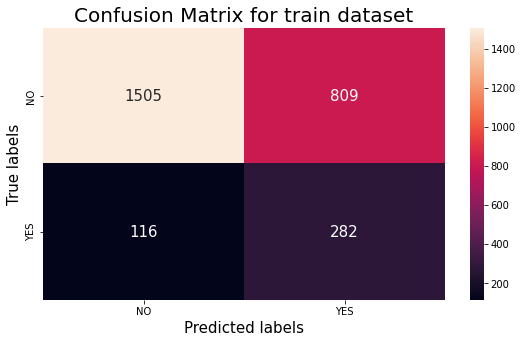

In [520]:
get_confusion_matrix(svc_bayes_optimal,X_train,y_train,'train')

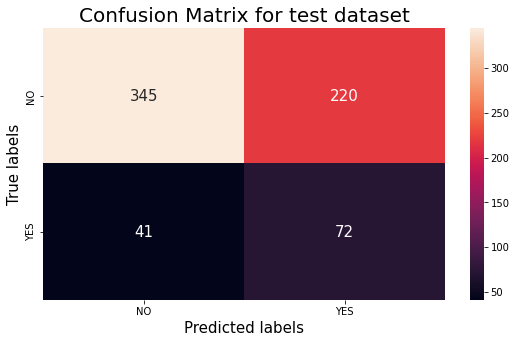

In [521]:
get_confusion_matrix(svc_bayes_optimal,X_test,y_test,'test')

In [522]:
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, svc_bayes_optimal.predict(X_train)))
print("\n")
print(classification_report(y_test, svc_bayes_optimal.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76      2314
           1       0.26      0.71      0.38       398

    accuracy                           0.66      2712
   macro avg       0.59      0.68      0.57      2712
weighted avg       0.83      0.66      0.71      2712



              precision    recall  f1-score   support

           0       0.89      0.61      0.73       565
           1       0.25      0.64      0.36       113

    accuracy                           0.62       678
   macro avg       0.57      0.62      0.54       678
weighted avg       0.79      0.62      0.66       678



In [529]:
feature_coefficients(svc_bayes_optimal,X_train)

,Features,Coef,Absolute coef
0,age,2.995752,2.995752
1,totChol,1.084902,1.084902
2,diabetes,0.827808,0.827808
3,BMI,0.826286,0.826286
4,prevalentHyp,0.701629,0.701629
5,is_smoking,0.586188,0.586188
6,prevalentStroke,0.544690,0.544690
7,sex,0.542605,0.542605
8,heartRate,0.249465,0.249465
9,BPMeds,0.170388,0.170388


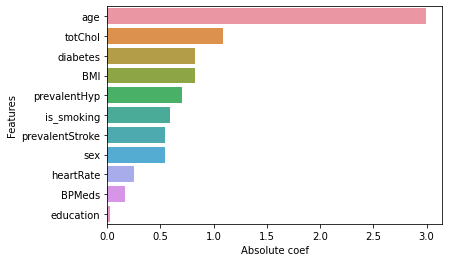

In [533]:
sns.barplot(x='Absolute coef',y='Features',data=feature_coefficients(svc_bayes_optimal,X_train))

# <b><u>Model Comparison based on performance

##function format : models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test)

In [523]:
# Get the accuracy score for the model
def models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test):
  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix
  # Initialize the variables
  roc_auc , accuracy , precision , recall ,logloss , fscore = [],[],[],[],[],[]
  for model_name in model_list:
    # Get the predicted classes
    train_class_preds = model_name.predict(X_train)
    test_class_preds = model_name.predict(X_test)

    # Get test scores
    fscore.append((round(f1_score(y_train,train_class_preds),3) ,round(f1_score(y_test, test_class_preds),3)))
    accuracy.append((round(accuracy_score(y_train,train_class_preds),3),round(accuracy_score(y_test, test_class_preds),3)))
    recall.append((round(recall_score(y_train,train_class_preds),3), round(recall_score(y_test, test_class_preds),3)))
    precision.append((round(precision_score(y_train,train_class_preds),3), round(precision_score(y_test, test_class_preds),3)))
    logloss.append((round(log_loss(y_train,train_class_preds),3),round(log_loss(y_test, test_class_preds),3)))
    roc_auc.append((round(roc_auc_score(y_train,train_class_preds),3), round(roc_auc_score(y_test, test_class_preds),3)))

  # Prepare a metric dataframe
  model_comparison = pd.DataFrame(list(zip(model_name_list,roc_auc,accuracy,precision,recall,logloss,fscore)), columns = ['Model_Name','roc_auc_score','Accuracy_score','Precision_score','Recall_score','log_loss','f_score'])
  return model_comparison 

## Get model comparison

In [524]:
model_list = [clf,lasso_bayes_optimal,rf_bayes_optimal, xgb_bayes_optimal,svc_bayes_optimal]
model_name_list = ['Logistic regression model','Logistic Lasso model','Random forest model', 'XG boosted tress model', 'Support vector machine model']

In [525]:
models_comparison(model_list, model_name_list, X_train, X_test, y_train, y_test)

,Model_Name,roc_auc_score,Accuracy_score,Precision_score,Recall_score,log_loss,f_score
0,Logistic regression model,"(0.524, 0.517)","(0.857, 0.838)","(0.636, 0.8)","(0.053, 0.035)","(4.954, 5.604)","(0.097, 0.068)"
1,Logistic Lasso model,"(0.529, 0.517)","(0.857, 0.838)","(0.619, 0.8)","(0.065, 0.035)","(4.941, 5.604)","(0.118, 0.068)"
2,Random forest model,"(0.5, 0.5)","(0.853, 0.833)","(0.0, 0.0)","(0.0, 0.0)","(5.069, 5.756)","(0.0, 0.0)"
3,XG boosted tress model,"(0.866, 0.52)","(0.961, 0.826)","(1.0, 0.368)","(0.731, 0.062)","(1.363, 6.011)","(0.845, 0.106)"
4,Support vector machine model,"(0.679, 0.624)","(0.659, 0.615)","(0.258, 0.247)","(0.709, 0.637)","(11.781, 13.296)","(0.379, 0.356)"


## **From above table, we can conclude that XG boosted model is far superior than the other models.** 
#### 'Logistic regression model' takes least amount of time n the model is easily interpretable but has some assumptions. Not good for real world scenarios.
#### 'Random forest model' took more building time n improved the precision but overall it gave almost same results as logistic regression model did. Also had to use SHAP explainer. It would have been better to invest all that time in XGboosted model.
#### 'Gradient boosted trees model' and 'XG boosted tress model' takes considerably large amount of time when compared to logistic regression model.
#### In this study we used BayesSearchCV based on the results from guided project. One may use RandomSeachCV if they want to save time, the result sometimes may surprise you :).



## **Understand the model using summary plot**
#### Important features to make a prediction are given in following figure. The features are presented in decreasing order of their importance i.e. top feature 'BMI' contributes most in predicting the output response of Insurance decision and its most valuable in most cases.

#### The correlation of the features with the dependent feature can be understood by the domination on right side of 0 on impact axis (X-axis). If most points are blue, like in 'BMI' or 'Wt' then that faeture is negatively correlated with dependent feature. The bulb of red points in case of 'Medical_History_4' feature suggests that it is positively correlated with the dependent feature.

#### The distribution of each feature can also be related. The 'BMI' feature is highly +vely skewed while 'Medical_History_4' feature is -vely skewed but not as skewed as 'BMI' is. 'Ins_Age' and'Family_Hist_3' is uniformly distributed. 

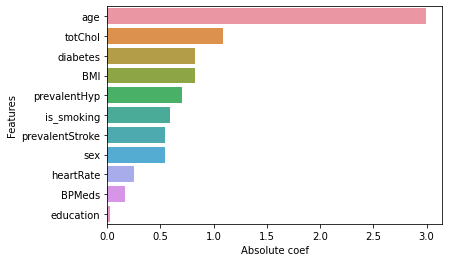

In [534]:
sns.barplot(x='Absolute coef',y='Features',data=feature_coefficients(svc_bayes_optimal,X_train))

# <b><u>Resampling data


* In ths case, we have a very small dataset with no definite pattern. Hence, the model I built are not accurate enough to.
* In such case, its important to restructure the data in favor of minority.
* I will be using feature importances from support vector machine model and XGBoost model.
* Keeping extremes for target =1 will be the main logic. We will be treating top 7 features for that
* Making use of reasearch topics on cardiovascular risk.

In [317]:
df_res = df.copy()

In [318]:
df_res.head()

,age,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,Target
0,64,2.0,0,1,0.0,0,0,0,221.0,25.38,90.0,1
1,36,4.0,1,0,0.0,0,1,0,212.0,29.77,72.0,0
2,46,1.0,0,1,0.0,0,0,0,250.0,20.35,88.0,0
3,50,1.0,1,1,0.0,0,1,0,233.0,28.26,68.0,1
4,64,1.0,0,1,0.0,0,0,0,241.0,26.42,70.0,0


In [319]:
df_res['Target'].value_counts()

0    2879
1     511
Name: Target, dtype: int64

##Risk Factors: Hypertension, blood chlorestrol, BMI, smoking, age

#### As we age, our hearts tend not to work as well. The heart’s walls may thicken and arteries may stiffen and harden, making the heart less able to pump blood to the muscles of the body. Because of these changes, the risk of developing cardiovascular disease increases with age. 
A person can be very healty still die of heart attack due to age

#### Setting boundaries

In [320]:
df_res[df_res['age']>=55]['Target'].value_counts()

0    789
1    261
Name: Target, dtype: int64

In [321]:
age = df_res[df_res['age']>=60] # then target =1 definite
age['Target'].value_counts()

0    398
1    159
Name: Target, dtype: int64

In [322]:
age['Target'] =1

In [323]:
hyp =df_res[(df_res['age']>=50) & (df_res['prevalentHyp']==1)] # This is a factor that is primary to heart attacks
hyp['Target'].value_counts()

0    518
1    208
Name: Target, dtype: int64

In [324]:
hyp['Target'] =1

In [325]:
smoking = df_res[(df_res['age']>=50) & (df_res['is_smoking']==1)] # This is a factor that also leads to cardiovascular diseases, lesser known fact
smoking['Target'].value_counts()

0    474
1    162
Name: Target, dtype: int64

In [326]:
smoking['Target'] =1

In [327]:
diabetes = df_res[(df_res['age']>=50) & (df_res['diabetes']==1)] #  65% of patients with diabetes die of some form of cardiovascular disease. The % risk only increases with age
diabetes['Target'].value_counts()

0    40
1    27
Name: Target, dtype: int64

In [328]:
diabetes['Target'] =1

In [329]:
BMI = df_res[(df_res['age']>=45) & (df_res['BMI']>30)] # This is one of the major factor that also leads to heart attack
BMI['Target'].value_counts()

0    234
1     69
Name: Target, dtype: int64

In [330]:
BMI['Target'] =1

In [331]:
chol = df_res[(df_res['age']>=55) & (df_res['totChol']>250)] # This is one of the major factor that also leads to heart attack
chol['Target'].value_counts()

0    383
1    119
Name: Target, dtype: int64

In [332]:
chol['Target'] =1

In [333]:
hst = df[(df['prevalentHyp']==1)&(df['is_smoking']==1)&(df['totChol']>240)]
hst['Target'].value_counts()

0    165
1     59
Name: Target, dtype: int64

In [334]:
hst['Target'] =1

In [335]:
hdb = df[(df['prevalentHyp']==1)&(df['diabetes']==1)&(df['BMI']>30)]
hdb['Target'].value_counts()

0    9
1    8
Name: Target, dtype: int64

In [336]:
hdb['Target'] =1

In [337]:
age.shape[0] + hyp.shape[0] + diabetes.shape[0] + smoking.shape[0] +  BMI.shape[0] + chol.shape[0] + hst.shape[0] + hdb.shape[0] # These many target=1 we are adding

3032

#### Oversampling the dataframe

In [338]:
df_res[(df_res['age']>=55) & ((df_res['diabetes']==1) | (df_res['totChol']>250) | (df_res['is_smoking']==1) | (df_res['prevalentHyp']==1))]['Target'].value_counts() # we want to remove target=0 from this

0    667
1    239
Name: Target, dtype: int64

In [339]:
df_os = pd.concat([df_res, age, hyp, diabetes, smoking, BMI,chol,hst,hdb])
df_os 

,age,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,Target
0,64,2.0,0,1,0.0,0,0,0,221.0,25.38,90.0,1
1,36,4.0,1,0,0.0,0,1,0,212.0,29.77,72.0,0
2,46,1.0,0,1,0.0,0,0,0,250.0,20.35,88.0,0
3,50,1.0,1,1,0.0,0,1,0,233.0,28.26,68.0,1
4,64,1.0,0,1,0.0,0,0,0,241.0,26.42,70.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2244,68,1.0,1,0,0.0,0,1,1,184.0,33.16,110.0,1
2636,52,1.0,1,0,0.0,0,1,1,178.0,40.11,75.0,1
3118,68,1.0,1,0,0.0,0,1,1,164.0,30.28,70.0,1
3190,50,1.0,0,0,0.0,0,1,1,260.0,43.67,85.0,1


In [340]:
df_os.duplicated().sum()

1853

In [341]:
df_os.drop_duplicates(subset=[ 'age',	'education' , 'sex', 	'is_smoking', 	'BPMeds' ,	'prevalentStroke', 	'prevalentHyp', 	'diabetes', 	'totChol', 'BMI', 	'heartRate'], keep='last', inplace=False, ignore_index=True)['Target'].value_counts()

0    1700
1    1690
Name: Target, dtype: int64

In [342]:
# Creating a new dataframe having over sampled data upto 50% in favor of minority
df_new = df_os.drop_duplicates(subset=[ 'age',	'education' , 'sex', 	'is_smoking', 	'BPMeds' ,	'prevalentStroke', 	'prevalentHyp', 	'diabetes', 	'totChol', 'BMI', 	'heartRate'], keep='last', inplace=False, ignore_index=True)
df_new.head()

,age,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,Target
0,36,4.0,1,0,0.0,0,1,0,212.0,29.77,72.0,0
1,46,1.0,0,1,0.0,0,0,0,250.0,20.35,88.0,0
2,36,4.0,1,1,0.0,0,0,0,295.0,28.15,60.0,0
3,53,2.0,0,0,0.0,0,0,0,210.0,22.49,88.0,0
4,43,2.0,0,0,0.0,0,0,0,213.0,19.38,74.0,0


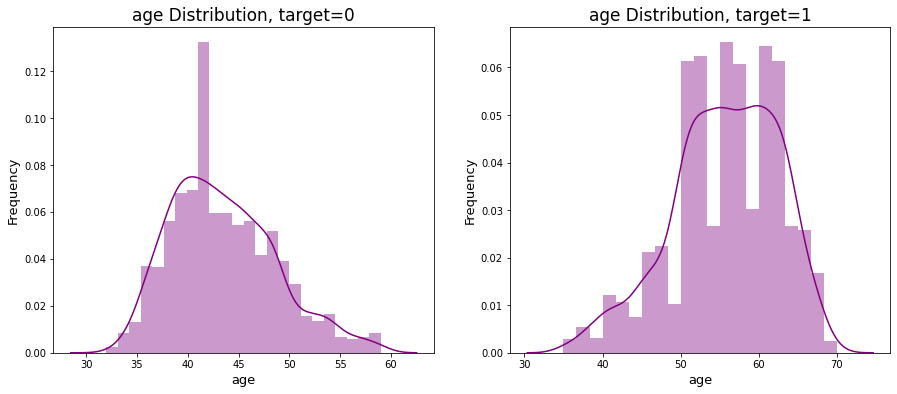

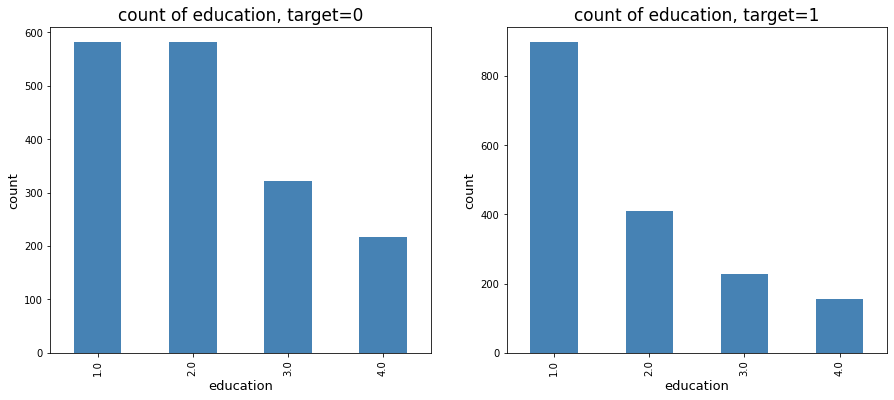

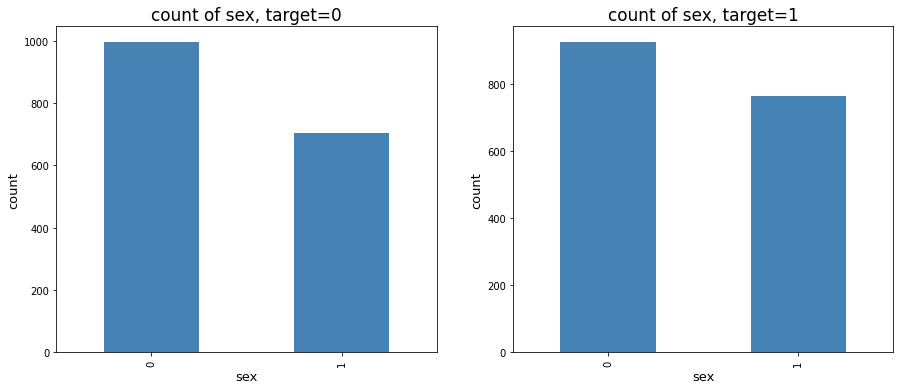

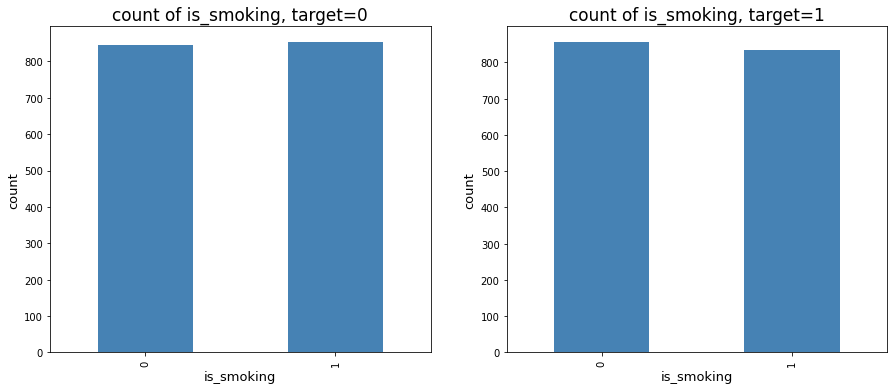

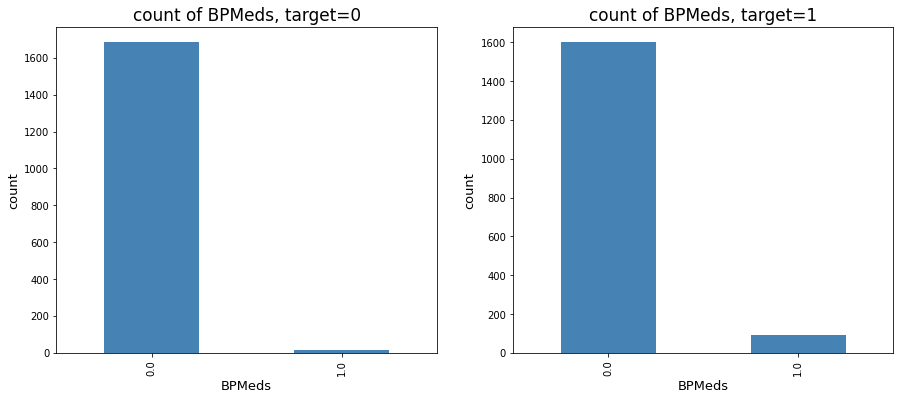

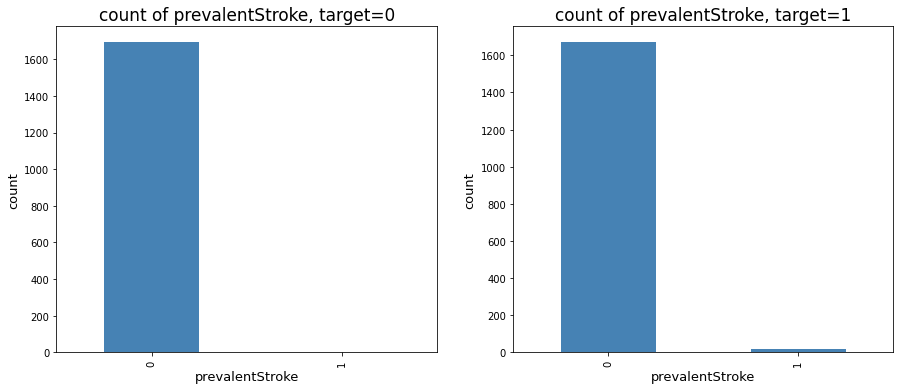

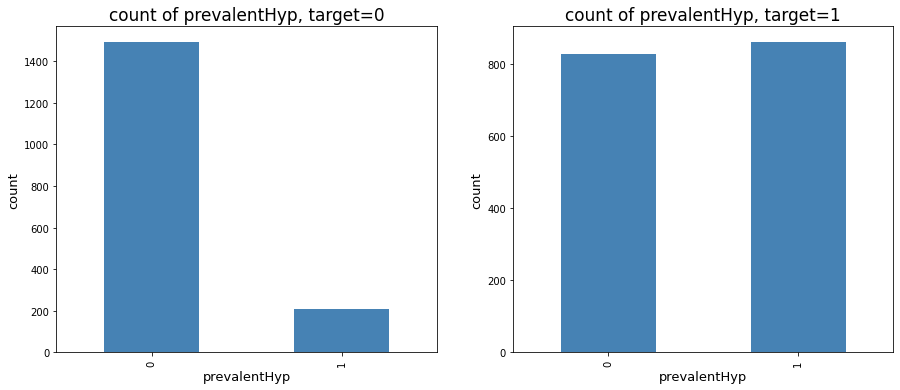

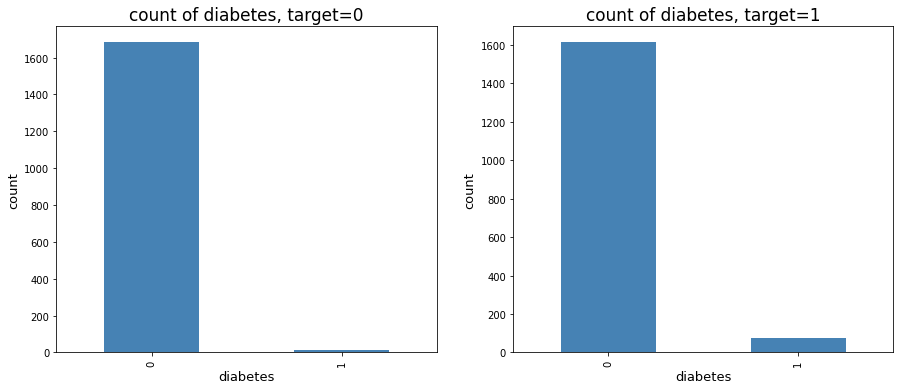

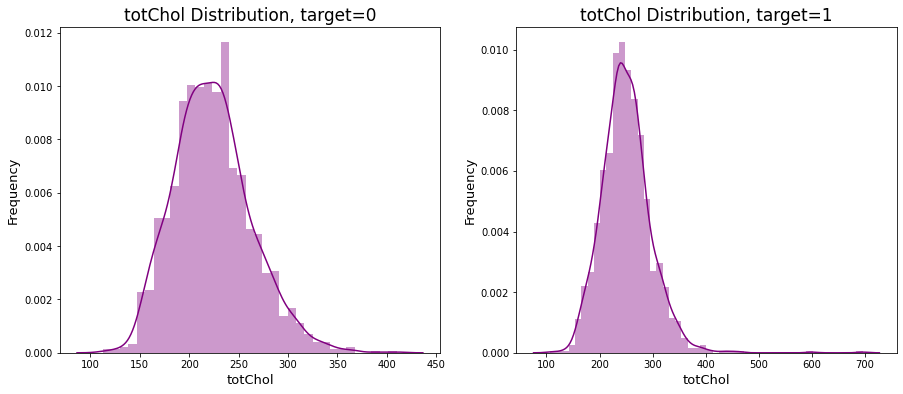

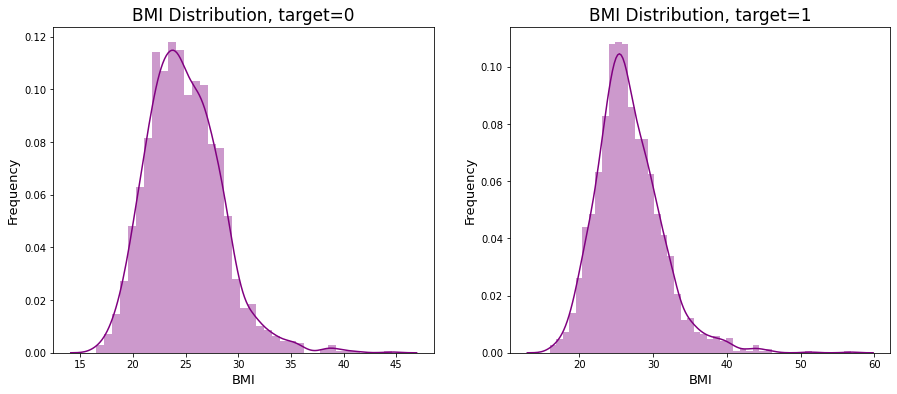

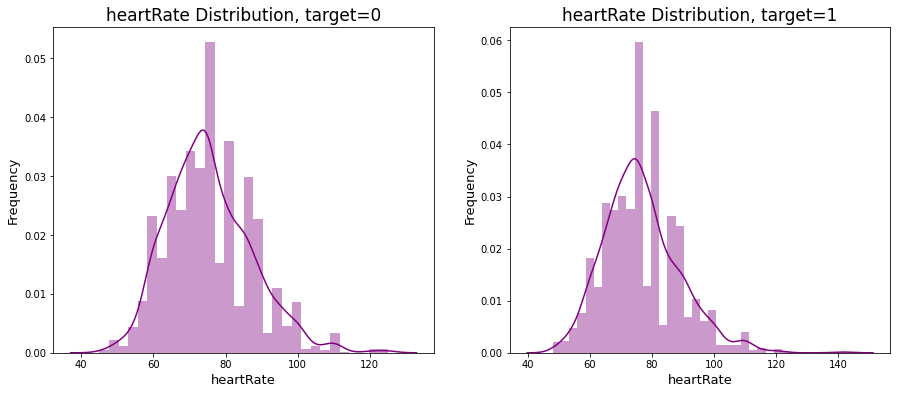

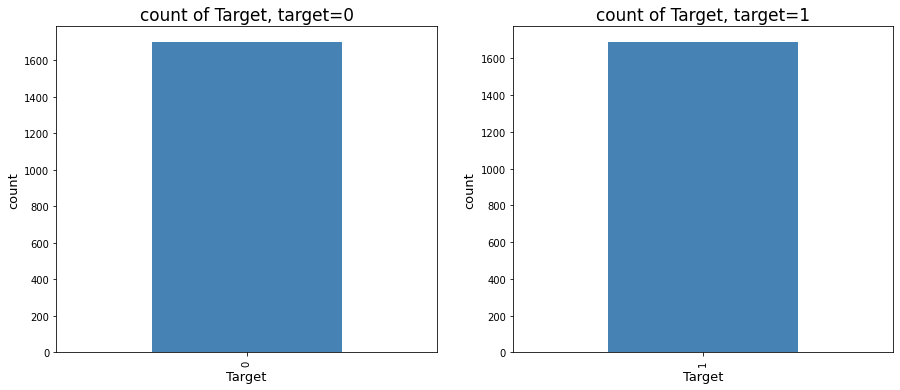

In [343]:
get_target_comp(df0=df_new[df_new['Target']==0], df1=df_new[df_new['Target']==1])

# <b><u>Build ML models

## Pre-processing

###train_test_split

In [344]:
df_new.head()

,age,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,Target
0,36,4.0,1,0,0.0,0,1,0,212.0,29.77,72.0,0
1,46,1.0,0,1,0.0,0,0,0,250.0,20.35,88.0,0
2,36,4.0,1,1,0.0,0,0,0,295.0,28.15,60.0,0
3,53,2.0,0,0,0.0,0,0,0,210.0,22.49,88.0,0
4,43,2.0,0,0,0.0,0,0,0,213.0,19.38,74.0,0


In [345]:
from sklearn.preprocessing import MinMaxScaler

In [346]:
scalar = MinMaxScaler()

In [347]:
X = pd.DataFrame(scalar.fit_transform(df_new.drop('Target',axis=1)),columns=df_new.drop('Target',axis=1).columns)

y = df_new['Target']

In [348]:
X.head()

,age,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate
0,0.105263,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.178268,0.338149,0.275510
1,0.368421,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.242784,0.107493,0.438776
2,0.105263,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.319185,0.298482,0.153061
3,0.552632,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.174873,0.159892,0.438776
4,0.289474,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.179966,0.083741,0.295918


In [349]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state=0)

# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(2712, 11) (2712,)
(678, 11) (678,)


In [350]:
y_train.value_counts()

1    1373
0    1339
Name: Target, dtype: int64

In [351]:
y_test.value_counts()

0    361
1    317
Name: Target, dtype: int64

### Importing all the libraries needed

In [352]:
# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [353]:
# Since we need to select the best model out of four, using BayesSeachCV
!pip install scikit-optimize

In [354]:
# Complex model will be interpreted with SHAP. Install shap 
!pip install shap

In [355]:
from skopt import BayesSearchCV
import time
import shap

### Creating functions to reduce number of lines of code

#### individual_model_performance(model_name,X_train,X_test,y_train,y_test)

In [356]:
# Get the accuracy score for the model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

#### get_confusion_matrix(model_name, X_train, X_test, y_train, y_test)

In [357]:
# Get the confusion matrix for both train and test
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

## <b><u>Logistic regression model 

### WIthout regularization

In [358]:
# Fitting the LogisticRegression on train data
clf = LogisticRegression(fit_intercept=True)
clf.fit(X_train, y_train)

LogisticRegression()

In [359]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [360]:
clf.score(X_train, y_train) , clf.score(X_test, y_test)

(0.8934365781710915, 0.8908554572271387)

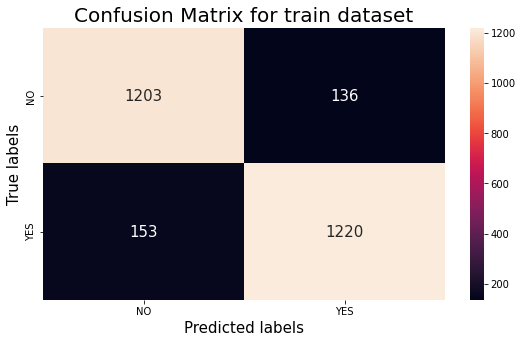

In [361]:
get_confusion_matrix(clf,X_train,y_train,'train')

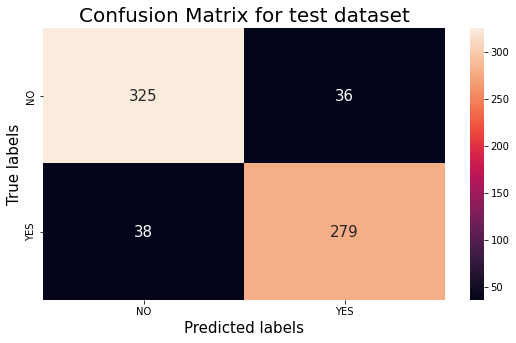

In [362]:
get_confusion_matrix(clf,X_test,y_test,'test')

In [363]:
clf.intercept_

array([-7.61987643])

In [364]:
# View the coefficient values
def feature_coefficients(model_name,X):
  labels = df.drop('Target',axis=1).columns
  coef = pd.DataFrame(list(zip(labels,model_name.coef_[0])),columns=['Features','Coef'])
  coef['Absolute coef'] = abs(coef['Coef'])
  coef.sort_values('Absolute coef',ascending=False,inplace=True)
  return coef.reset_index(drop=True)

In [365]:
feature_coefficients(clf,X_train)

,Features,Coef,Absolute coef
0,age,10.712215,10.712215
1,totChol,3.214196,3.214196
2,BMI,3.199544,3.199544
3,prevalentHyp,1.913945,1.913945
4,is_smoking,1.517899,1.517899
5,diabetes,1.239775,1.239775
6,prevalentStroke,0.365816,0.365816
7,education,-0.226809,0.226809
8,BPMeds,-0.213676,0.213676
9,heartRate,-0.159425,0.159425


In [366]:
# Get model performance using function I built, model_performance
individual_model_performance(clf,X_train,X_test,y_train,y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.894100,0.882911
1,Accuracy,0.893437,0.890855
2,Recall,0.888565,0.880126
3,Precision,0.899705,0.885714
4,log_loss,3.680610,3.769761
5,roc_auc,0.893498,0.890202


### With lasso regularization

In [367]:
start = time. time()

lasso = LogisticRegression(penalty='l1',solver='liblinear', fit_intercept=True, max_iter=10000)

lasso_bayes = BayesSearchCV(estimator=lasso, search_spaces={'C':(0.0001,10)}, n_iter=30, cv = 3, verbose=2, scoring='recall')

# Fit the data
lasso_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...............................C=2.9555042799387996; total time=   0.0s
[CV] END ...............................C=2.9555042799387996; total time=   0.1s
[CV] END ...............................C=2.9555042799387996; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ................................C=6.972094968110911; total time=   0.0s
[CV] END ................................C=6.972094968110911; total time=   0.0s
[CV] END ................................C=6.972094968110911; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ................................C=6.961276751869811; total time=   0.1s
[CV] END ................................C=6.961276751869811; total time=   0.0s
[CV] END ................................C=6.961276751869811; total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ..........................

In [368]:
lasso_bayes.best_estimator_

LogisticRegression(C=1.5788628685300856, max_iter=10000, penalty='l1',
                   solver='liblinear')

In [375]:
lasso_bayes_optimal = lasso_bayes.best_estimator_

#### Performance check

In [377]:
lasso_bayes_optimal.score(X_train,y_train), lasso_bayes_optimal.score(X_test,y_test)

(0.8949115044247787, 0.8849557522123894)

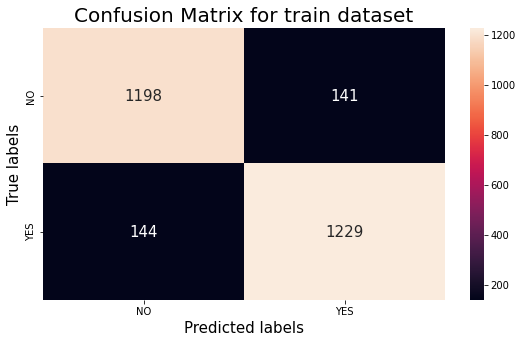

In [378]:
get_confusion_matrix(lasso_bayes_optimal,X_train,y_train,'train')

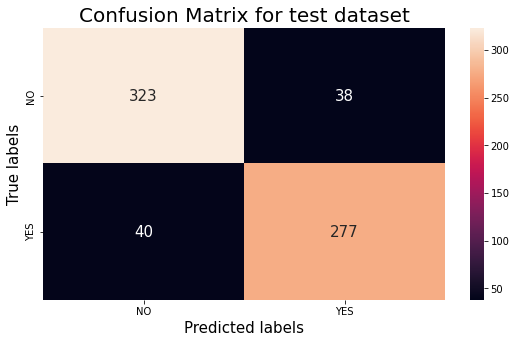

In [379]:
get_confusion_matrix(lasso_bayes_optimal,X_test,y_test,'test')

In [380]:
feature_coefficients(lasso_bayes_optimal,X_train)

,Features,Coef,Absolute coef
0,age,13.224679,13.224679
1,BMI,5.035698,5.035698
2,totChol,4.900701,4.900701
3,prevalentHyp,2.077232,2.077232
4,is_smoking,1.961970,1.961970
5,diabetes,1.480552,1.480552
6,BPMeds,-0.169044,0.169044
7,education,-0.156435,0.156435
8,heartRate,-0.134787,0.134787
9,sex,0.086180,0.086180


In [381]:
# Get model performance using function I built, model_performance
individual_model_performance(lasso_bayes_optimal,X_train,X_test,y_train,y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.896099,0.876582
1,Accuracy,0.894912,0.884956
2,Recall,0.895120,0.873817
3,Precision,0.897080,0.879365
4,log_loss,3.629670,3.973532
5,roc_auc,0.894909,0.884277


## <b><u>Random Forest Classifier model

### Training a Random Forest Classifier

In [382]:
rf_model = RandomForestClassifier(max_depth=25, min_samples_leaf=10,min_samples_split=10,n_jobs=2)
rf_model.fit(X_train,y_train)
clf.score(X_train, y_train) , clf.score(X_test, y_test)

(0.8934365781710915, 0.8908554572271387)

In [383]:
start = time. time()

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()
# Grid search
rf_bayes= BayesSearchCV(estimator=rf_model,
                       search_spaces = {'max_depth': (5,25),
                                    'min_samples_leaf': (5,150),
                                    'min_samples_split': (5,150)}, n_iter=50,
                       cv = 3, verbose=2, scoring='recall',random_state=0)
# Fit the data
rf_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=16, min_samples_leaf=103, min_samples_split=95; total time=   0.4s
[CV] END max_depth=16, min_samples_leaf=103, min_samples_split=95; total time=   0.4s
[CV] END max_depth=16, min_samples_leaf=103, min_samples_split=95; total time=   0.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=10, min_samples_leaf=147, min_samples_split=137; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=147, min_samples_split=137; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=147, min_samples_split=137; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=16, min_samples_leaf=13, min_samples_split=55; total time=   0.2s
[CV] END max_depth=16, min_samples_leaf=13, min_samples_split=55; total time=   0.2s
[CV] END max_depth=16, min_samples_leaf=13, min_samples_split=55; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalli

In [384]:
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=25, min_samples_leaf=5, min_samples_split=5)

In [385]:
rf_bayes_optimal = rf_bayes.best_estimator_

### Performance check

In [386]:
rf_bayes_optimal.score(X_train,y_train),rf_bayes_optimal.score(X_test,y_test)

(0.9598082595870207, 0.9454277286135693)

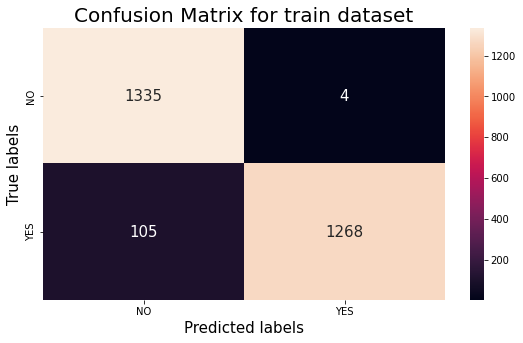

In [387]:
get_confusion_matrix(rf_bayes_optimal,X_train,y_train,'train')

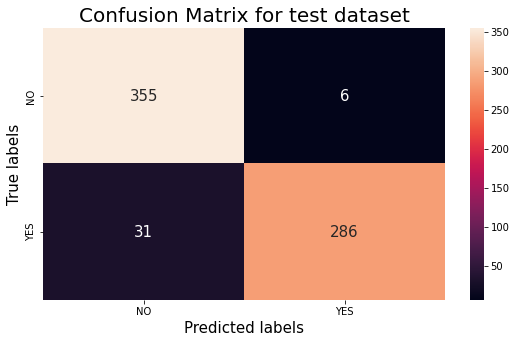

In [388]:
get_confusion_matrix(rf_bayes_optimal,X_test,y_test,'test')

In [389]:
individual_model_performance(rf_bayes_optimal, X_train, X_test, y_train, y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.958790,0.939245
1,Accuracy,0.959808,0.945428
2,Recall,0.923525,0.902208
3,Precision,0.996855,0.979452
4,log_loss,1.388175,1.884867
5,roc_auc,0.960269,0.942794


In [390]:
def get_feature_importance(model_name,X_train):
  importances = model_name.feature_importances_

  importance_dict = {'Feature' : df.drop('Target',axis=1).columns,
                    'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],3)
  importance_df.sort_values('Feature Importance',ascending=False,inplace =True)
  importance_df.reset_index(drop=True,inplace=True)
  return importance_df[importance_df['Feature Importance']>0]

In [391]:
rf_feature_importance = get_feature_importance(rf_bayes_optimal,X_train)
rf_feature_importance

,Feature,Feature Importance
0,age,0.607
1,prevalentHyp,0.130
2,totChol,0.086
3,BMI,0.066
4,is_smoking,0.056
5,heartRate,0.023
6,education,0.020
7,sex,0.007
8,diabetes,0.003
9,BPMeds,0.002


### Model Interpretation

#### Summary Plot - Impact of features on predictions at global level

In [392]:
def get_summary_plot(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values[1], X_importance)

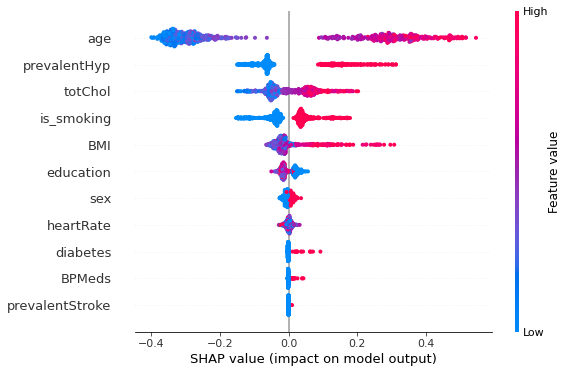

In [393]:
get_summary_plot(rf_bayes_optimal,X_test)

In [394]:
 def get_summary_bar_plot(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values[1], X_importance, plot_type='bar') 

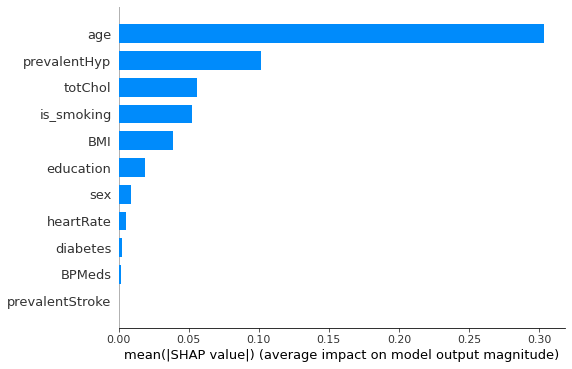

In [395]:
get_summary_bar_plot(rf_bayes_optimal,X_test)

## <b><u>XGBClassifier model

### Training a XGB Classifier

In [ ]:
start = time. time()

# Create an instance of the RandomForestClassifier
xgb_model = XGBClassifier(subsample=0.9, colsample_bytree =0.4,random_state=0)

# Grid search
xgb_bayes= BayesSearchCV(estimator=xgb_model,
                       search_spaces = {'max_depth': (5,25),
                                    'min_samples_weight': (0.9,1),
                                    'reg_alpha':(0.1,10), 'gamma':(0.1,1)}, n_iter=50,
                       cv = 4, verbose=2, scoring='recall',random_state=0)
# Fit the data
xgb_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END gamma=0.5778677484569327, max_depth=19, min_samples_weight=0.9622709752629437, reg_alpha=6.502131416609406; total time=   0.1s
[CV] END gamma=0.5778677484569327, max_depth=19, min_samples_weight=0.9622709752629437, reg_alpha=6.502131416609406; total time=   0.1s
[CV] END gamma=0.5778677484569327, max_depth=19, min_samples_weight=0.9622709752629437, reg_alpha=6.502131416609406; total time=   0.1s
[CV] END gamma=0.5778677484569327, max_depth=19, min_samples_weight=0.9622709752629437, reg_alpha=6.502131416609406; total time=   0.1s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END gamma=0.33253449577547334, max_depth=25, min_samples_weight=0.9908438373669974, reg_alpha=6.0334856928085125; total time=   0.1s
[CV] END gamma=0.33253449577547334, max_depth=25, min_samples_weight=0.9908438373669974, reg_alpha=6.0334856928085125; total time=   0.1s
[CV] END gamma=0.33253449577547334, max_depth=25, min_samples_

In [ ]:
xgb_bayes.best_estimator_

In [ ]:
xgb_bayes_optimal = xgb_bayes.best_estimator_

### Performance check

In [ ]:
xgb_bayes_optimal.score(X_train,y_train),xgb_bayes_optimal.score(X_test,y_test)

In [ ]:
get_confusion_matrix(rf_bayes_optimal,X_train,y_train,'train')

In [ ]:
get_confusion_matrix(xgb_bayes_optimal,X_test,y_test,'test')

In [ ]:
individual_model_performance(xgb_bayes_optimal, X_train, X_test, y_train, y_test)

In [ ]:
xgb_feature_importance = get_feature_importance(xgb_bayes_optimal,X_train)
xgb_feature_importance

### Model Interpretation

#### Functions for shap plots


In [ ]:
def get_force_plot_for1ob_BT(model_name,X_test):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model_name)
  # obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[0])

  # explainer.expected_value[0] means mean probability for 0,  shap_values[0] means shape values for class 0 
  plot = shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0]) 
  return plot

In [ ]:
def get_force_plot_for100ob_BT(model_name,X_test):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model_name)
  # obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[:100])

  # explainer.expected_value[0] means mean probability for 0,  shap_values[0] means 
  plot = shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:100]) 
  return plot

In [ ]:
def get_summary_plot_BT(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance)

In [ ]:
 def get_summary_bar_plot_BT(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance, plot_type='bar') 

#### Force Plot - to view features contribution in prediction at local level

a) Force plot for 1 observation

In [ ]:
get_force_plot_for1ob_BT(xgb_bayes_optimal,X_test)

b) Force plot of 100 observations

In [ ]:
get_force_plot_for100ob_BT(xgb_bayes_optimal,X_test)

#### Summary Plot - Impact of features on predictions at global level

In [ ]:
get_summary_plot_BT(xgb_bayes_optimal,X_test)

In [ ]:
get_summary_bar_plot_BT(xgb_bayes_optimal,X_test)

## Support vector machine model

### Without regularization

In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))

In [ ]:
get_confusion_matrix(svc_model,X_train,y_train,'train')

In [ ]:
get_confusion_matrix(svc_model,X_test,y_test,'test')

In [ ]:
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, svc_model.predict(X_train)))
print("\n")
print(classification_report(y_test, svc_predict))

In [ ]:
individual_model_performance(svc_model, X_train, X_test, y_train, y_test)

### Best SVM model

In [ ]:
start = time. time()

# Create an instance of the RandomForestClassifier
svm = SVC(class_weight='balanced', probability=True)

# Grid search
svm_bayes= BayesSearchCV(estimator=svm,
                       search_spaces = {'kernel':['linear','rbf'],'C': (0.0001,10),
                                    'gamma': (0.1,1)}, n_iter=50,
                       cv = 4, verbose=2, scoring='recall')
# Fit the data
svm_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

In [ ]:
svm_bayes.best_estimator_

In [ ]:
svc_bayes_optimal = svm_bayes.best_estimator_

In [ ]:
get_confusion_matrix(svc_bayes_optimal,X_train,y_train,'train')

In [ ]:
get_confusion_matrix(svc_bayes_optimal,X_test,y_test,'test')

In [ ]:
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, svc_bayes_optimal.predict(X_train)))
print("\n")
print(classification_report(y_test, svc_bayes_optimal.predict(X_test)))

In [ ]:
feature_coefficients(svc_bayes_optimal,X_train)

In [ ]:
sns.barplot(x='Absolute coef',y='Features',data=feature_coefficients(svc_bayes_optimal,X_train))

In [ ]:
individual_model_performance(svc_bayes_optimal, X_train, X_test, y_train, y_test)

# <b><u>Model Comparison based on performance

##function format : models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test)

In [ ]:
# Get the accuracy score for the model
def models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test):
  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix
  # Initialize the variables
  roc_auc , accuracy , precision , recall ,logloss , fscore = [],[],[],[],[],[]
  for model_name in model_list:
    # Get the predicted classes
    train_class_preds = model_name.predict(X_train)
    test_class_preds = model_name.predict(X_test)

    # Get test scores
    fscore.append((round(f1_score(y_train,train_class_preds),3) ,round(f1_score(y_test, test_class_preds),3)))
    accuracy.append((round(accuracy_score(y_train,train_class_preds),3),round(accuracy_score(y_test, test_class_preds),3)))
    recall.append((round(recall_score(y_train,train_class_preds),3), round(recall_score(y_test, test_class_preds),3)))
    precision.append((round(precision_score(y_train,train_class_preds),3), round(precision_score(y_test, test_class_preds),3)))
    logloss.append((round(log_loss(y_train,train_class_preds),3),round(log_loss(y_test, test_class_preds),3)))
    roc_auc.append((round(roc_auc_score(y_train,train_class_preds),3), round(roc_auc_score(y_test, test_class_preds),3)))

  # Prepare a metric dataframe
  model_comparison = pd.DataFrame(list(zip(model_name_list,roc_auc,accuracy,precision,recall,logloss,fscore)), columns = ['Model_Name','roc_auc_score','Accuracy_score','Precision_score','Recall_score','log_loss','f_score'])
  return model_comparison 

## Get model comparison

In [ ]:
model_list = [clf,lasso_bayes_optimal,rf_bayes_optimal, xgb_bayes_optimal,svc_bayes_optimal]
model_name_list = ['Logistic regression model','Logistic Lasso model','Random forest model', 'XG boosted tress model', 'Support vector machine model']

In [ ]:
models_comparison(model_list, model_name_list, X_train, X_test, y_train, y_test)

## **From above table, we can conclude that XG boosted model is far superior than the other models.** 
#### 'Logistic regression model' takes least amount of time n the model is easily interpretable but has some assumptions. Not good for real world scenarios.
#### 'Random forest model' took more building time n improved the precision but overall it gave almost same results as logistic regression model did. Also had to use SHAP explainer. It would have been better to invest all that time in XGboosted model.
#### 'Gradient boosted trees model' and 'XG boosted tress model' takes considerably large amount of time when compared to logistic regression model.
#### In this study we used BayesSearchCV based on the results from guided project. One may use RandomSeachCV if they want to save time, the result sometimes may surprise you :).



## **Understand the model using summary plot**
#### Important features to make a prediction are given in following figure. The features are presented in decreasing order of their importance i.e. top feature 'BMI' contributes most in predicting the output response of Insurance decision and its most valuable in most cases.

#### The correlation of the features with the dependent feature can be understood by the domination on right side of 0 on impact axis (X-axis). If most points are blue, like in 'BMI' or 'Wt' then that faeture is negatively correlated with dependent feature. The bulb of red points in case of 'Medical_History_4' feature suggests that it is positively correlated with the dependent feature.

#### The distribution of each feature can also be related. The 'BMI' feature is highly +vely skewed while 'Medical_History_4' feature is -vely skewed but not as skewed as 'BMI' is. 'Ins_Age' and'Family_Hist_3' is uniformly distributed. 

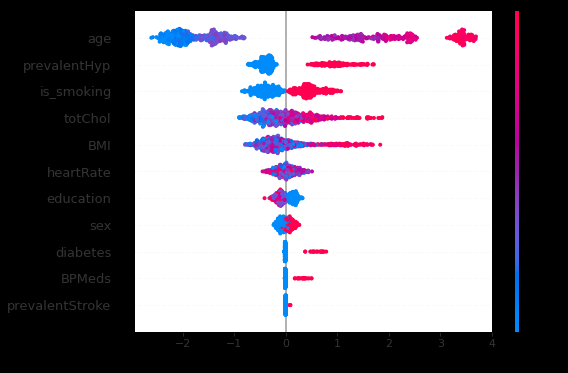

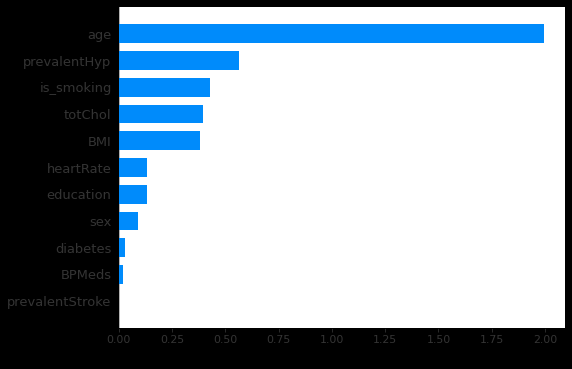

In [ ]:
sns.barplot(x='Absolute coef',y='Features',data=feature_coefficients(svc_bayes_optimal,X_train))

## Oversampling using smote

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['Target'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

In [ ]:
x_smote

In [ ]:
y_smote.value_counts()